In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno  
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

Tabloları pandas ile okuma işlemi:

In [2]:
df_unpaidWork=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/1- female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv")
df_unpaidWork2=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/4- female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv")
df_women_top_income=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/2- share-of-women-in-top-income-groups.csv")
df_labor_force_ratio=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/3- ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv")
df_maternal_mortality=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/5- maternal-mortality.csv")
df_gender_wage_gap=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/6- gender-gap-in-average-wages-ilo.csv")
df_women_entr=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/Labor Force-Women Entrpreneurship.csv",sep=';')
df_male_labor_part=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/Labour Force Participation - Male.csv")
df_female_labor_part=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/Labour Force Participation Female.csv")
df_placement=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/Placement.csv")
df_women_ent_data=pd.read_csv("/kaggle/input/up-school-women-in-datathon-dataset/Women Ent_Data3.csv",sep=';')

# Unpaid Works

İlk bakmak istediğim şey aslında 1. ve 4. veri setlerinin arasında bir fark olup olmadığı. Bu sebeple kolonları birleştirerek farklılık olan satırları getirme işlemini gerçekleştirdim ve sonuçta da görüldüğü gibi herhangi bir çıktı gelmedi. Bu sebeple bu iki veri setinin aynı olduğunu söyleyebilirim.

In [3]:
df_unpaidWork2.head()

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014))
0,Albania,ALB,2014,7.21
1,Algeria,DZA,2014,6.75
2,Argentina,ARG,2014,2.88
3,Armenia,ARM,2014,5.24
4,Australia,AUS,2014,1.81


In [4]:
df_unpaidWork.head()

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014))
0,Albania,ALB,2014,7.21
1,Algeria,DZA,2014,6.75
2,Argentina,ARG,2014,2.88
3,Armenia,ARM,2014,5.24
4,Australia,AUS,2014,1.81


In [5]:
df_unpaidWork2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Entity                                                                  69 non-null     object 
 1   Code                                                                    68 non-null     object 
 2   Year                                                                    69 non-null     int64  
 3   Female to male ratio of time devoted to unpaid care work (OECD (2014))  69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [6]:
df_unpaidWork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Entity                                                                  69 non-null     object 
 1   Code                                                                    68 non-null     object 
 2   Year                                                                    69 non-null     int64  
 3   Female to male ratio of time devoted to unpaid care work (OECD (2014))  69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [7]:

merged_df = pd.merge(df_unpaidWork2,df_unpaidWork2, left_on=['Code', 'Female to male ratio of time devoted to unpaid care work (OECD (2014))'], right_on=['Code', 'Female to male ratio of time devoted to unpaid care work (OECD (2014))'],how='outer',indicator=True)
print(merged_df)


         Entity_x Code  Year_x  \
0         Albania  ALB    2014   
1       Argentina  ARG    2014   
2         Armenia  ARM    2014   
3       Australia  AUS    2014   
4         Austria  AUT    2014   
..            ...  ...     ...   
64         Uganda  UGA    2014   
65        Uruguay  URY    2014   
66  United States  USA    2014   
67   South Africa  ZAF    2014   
68          Korea  NaN    2014   

    Female to male ratio of time devoted to unpaid care work (OECD (2014))  \
0                                                7.21                        
1                                                2.88                        
2                                                5.24                        
3                                                1.81                        
4                                                1.95                        
..                                                ...                        
64                                           

In [8]:
different_rows = merged_df[merged_df['_merge'] != 'both']
different_rows

,Entity_x,Code,Year_x,Female to male ratio of time devoted to unpaid care work (OECD (2014)),Entity_y,Year_y,_merge


Unpaid Work: çamaşır yıkamak, yemek pişirmek, alışveriş yapmak, temizlik yapmak ve diğer ailelere ev işlerinde yardım etmek de buna dahildir. Ücretsiz iş, gıda, yakıt ve su toplama ve diğer enerji tedarikini, kayıt dışı ücretsiz işleri, tarımda aile emeğini vb. içerir.

In [9]:
df_unpaidWork.head()

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014))
0,Albania,ALB,2014,7.21
1,Algeria,DZA,2014,6.75
2,Argentina,ARG,2014,2.88
3,Armenia,ARM,2014,5.24
4,Australia,AUS,2014,1.81


Bu tablo, OECD'nin 2014 yılı verilerine göre bazı ülkelerde kadınların, erkeklere kıyasla ücretsiz bakım işlerine ne kadar daha fazla zaman ayırdıklarını gösteren oranları içeriyor. Örneğin, Arnavutluk'ta kadınlar, erkeklere göre 7.21 kat daha fazla ücretsiz bakım işi yapmışlar. Bu oranlar, ülkelere göre değişkenlik gösteriyor.

In [10]:
df_unpaidWork.info() # Code sütununda 1 tane boş değer var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Entity                                                                  69 non-null     object 
 1   Code                                                                    68 non-null     object 
 2   Year                                                                    69 non-null     int64  
 3   Female to male ratio of time devoted to unpaid care work (OECD (2014))  69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [11]:
df_unpaidWork[df_unpaidWork["Code"].isnull()] #Kore'nin ülke kodu girilmemiş. Bu doldurulmalı.

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014))
33,Korea,NaN,2014,5.28


In [12]:
df_unpaidWork["Year"].unique() #sadece 2014 yılının verileri alınmış.

array([2014])

In [13]:
df_unpaidWork["Entity"].nunique() #69 ülke baz alınmış.

69

In [14]:
df_unpaidWork[df_unpaidWork["Entity"]== "Korea"] #KR

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014))
33,Korea,NaN,2014,5.28


In [15]:
df_unpaidWork.loc[df_unpaidWork['Entity'] == 'Korea', 'Code'] = 'KR'


Neden KR?

In [16]:
df_unpaidWork.isnull().sum()

Entity                                                                    0
Code                                                                      0
Year                                                                      0
Female to male ratio of time devoted to unpaid care work (OECD (2014))    0
dtype: int64

In [17]:
df_unpaidWork["Female to male ratio of time devoted to unpaid care work (OECD (2014))"].unique()

array([ 7.21,  6.75,  2.88,  5.24,  1.81,  1.95,  3.77,  1.69,  3.24,
        2.7 ,  1.92,  4.  ,  1.56,  1.71,  2.57,  3.23,  3.38,  3.  ,
        1.3 ,  3.54,  1.74,  1.9 ,  1.79,  3.03,  3.02,  2.67,  1.86,
        9.83,  2.29,  3.37,  4.83,  1.73,  5.28,  2.46,  2.15,  2.5 ,
        2.09,  3.81, 17.29,  3.79,  3.32,  1.77,  2.18,  3.8 ,  1.61,
       10.25,  2.53,  2.01,  4.25,  2.22,  2.45,  1.87,  2.77,  3.04,
        1.49,  1.75,  2.81,  7.49,  6.22,  1.18,  1.85,  2.64])

In [18]:
df_unpaidWork["Code"].unique()

array(['ALB', 'DZA', 'ARG', 'ARM', 'AUS', 'AUT', 'BGD', 'BEL', 'BEN',
       'BRA', 'BGR', 'KHM', 'CAN', 'CHL', 'CHN', 'COL', 'CRI', 'CUB',
       'DNK', 'ECU', 'EST', 'FIN', 'FRA', 'DEU', 'GHA', 'GTM', 'HND',
       'HUN', 'IND', 'IRL', 'ITA', 'JPN', 'KAZ', 'KR', 'KGZ', 'LVA',
       'LSO', 'LTU', 'MDG', 'MLI', 'MUS', 'MEX', 'MDA', 'MNG', 'NLD',
       'NZL', 'NIC', 'NGA', 'MKD', 'NOR', 'PAK', 'PER', 'POL', 'PRT',
       'ROU', 'SRB', 'SVN', 'ZAF', 'ESP', 'SWE', 'CHE', 'TZA', 'THA',
       'TUN', 'TUR', 'UGA', 'GBR', 'USA', 'URY'], dtype=object)

In [19]:
df_unpaidWork["Entity"].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Bangladesh', 'Belgium', 'Benin', 'Brazil', 'Bulgaria',
       'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Cuba', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Ghana', 'Guatemala', 'Honduras', 'Hungary', 'India',
       'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Korea', 'Kyrgyzstan',
       'Latvia', 'Lesotho', 'Lithuania', 'Madagascar', 'Mali',
       'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway',
       'Pakistan', 'Peru', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Tanzania', 'Thailand', 'Tunisia', 'Turkey', 'Uganda',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

Verilere göre kadınlar erkeklerden 3 kat daha fazla ücretsiz bakım işlerine zaman
ayırıyor. En düşük orana sahip ülkenin bile erkeklerden 1.18 kat daha fazla zaman harcayan kadınlara sahip olduğunu gösteriyor.

Aynı zamanda oranın standart sapmasına bakıldığında yüksek olduğunu görebiliyoruz. Çünkü ortalama 3.24'ken std >>2.51 Sonuç olarak ülkeler arasında büyük farklılıkların olduğunu ve kadın-erkek arasındaki ücretsiz bakım işi zamanı oranının dünya genelinde tutarlı olmadığını çıkarabiliriz.

In [20]:
df_unpaidWork.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,69.0,2014.000000,0.000000,2014.00,2014.00,2014.00,2014.00,2014.00
Female to male ratio of time devoted to unpaid care work (OECD (2014)),69.0,3.248696,2.510711,1.18,1.81,2.53,3.38,17.29


Bu farklılıkların kıtaya göre oluşup oluşmadığını merak ediyorum. Bu sebeple Kaggle'dan ülke-kıta eşleşmesine sahip bir dataset daha kullanmaya karar verdim.

In [21]:
df_kita=pd.read_csv("/kaggle/input/world-population-by-countries/countries-continents-capitals.csv",encoding='latin1')
df_kita.head()

,Country/Territory,Capital,Continent
0,Afghanistan,Kabul,Asia
1,Albania,Tirana,Europe
2,Algeria,Algiers,Africa
3,American Samoa,Pago Pago,Oceania
4,Andorra,Andorra la Vella,Europe


In [22]:
df_kita=df_kita.drop("Capital",axis=1)

In [23]:
df_kita.rename(columns={'Country/Territory': 'Entity'}, inplace=True)

In [24]:

df_kitaUlke=pd.merge(df_unpaidWork, df_kita, on='Entity')

In [25]:
df_kitaUlke #İlk datasetteki verilere ilave ülkelerin kıtaları da eklendi.

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014)),Continent
0,Albania,ALB,2014,7.21,Europe
1,Algeria,DZA,2014,6.75,Africa
2,Argentina,ARG,2014,2.88,South America
3,Armenia,ARM,2014,5.24,Asia
4,Australia,AUS,2014,1.81,Oceania
...,...,...,...,...,...
63,Turkey,TUR,2014,6.22,Asia
64,Uganda,UGA,2014,1.18,Africa
65,United Kingdom,GBR,2014,1.85,Europe
66,United States,USA,2014,1.61,North America


In [26]:
df_groupKitaUlke=df_kitaUlke.groupby('Continent')['Female to male ratio of time devoted to unpaid care work (OECD (2014))'].agg(['mean', 'median', 'min', 'max'])



**Afrika ve Asya**, ortalama ve medyan değerlere bakıldığında, kadınların erkeklere kıyasla ücretsiz bakım işlerine en fazla zaman ayırdığı kıtalar arasında yer alır. Afrika'da en yüksek maksimum oran (17.29) ve Asya'da da yüksek bir maksimum oran (10.25) görülür, bu durum bu kıtalarda kadınların aşırı derecede daha fazla ücretsiz bakım işi yaptığını gösterir.
**Avrupa**, kadın ve erkek arasındaki ücretsiz bakım işi zamanı oranının en düşük olduğu kıta olarak öne çıkar, hem ortalama (2.31) hem de medyan (1.92) değerlerle. Bu, Avrupa'da cinsiyet eşitliğinin diğer kıtalara göre daha fazla sağlandığını işaret edebilir.
**Kuzey Amerika ve Güney Amerika** da ortalama ve medyan değerler bakımından orta seviyede yer alır, bu bölgelerde kadınlar erkeklere kıyasla daha fazla zaman ayırır, ancak Afrika ve Asya'daki kadar keskin farklar yoktur.
**Okyanusya**, en düşük ortalama (1.76) ve çok dar bir min-max aralığına (1.71 - 1.81) sahip olmasıyla dikkat çeker. Bu, kıtadaki ülkeler arasında ücretsiz bakım işlerine ayrılan zaman açısından büyük farklılıkların olmadığını gösterir.

In [27]:
df_groupKitaUlke

,mean,median,min,max
Continent,,,,
Africa,4.705833,3.135,1.18,17.29
Asia,4.570833,3.885,1.73,10.25
Europe,2.312963,1.920,1.30,7.21
North America,2.795000,3.010,1.56,3.80
Oceania,1.760000,1.760,1.71,1.81
South America,2.747143,2.700,1.71,3.54


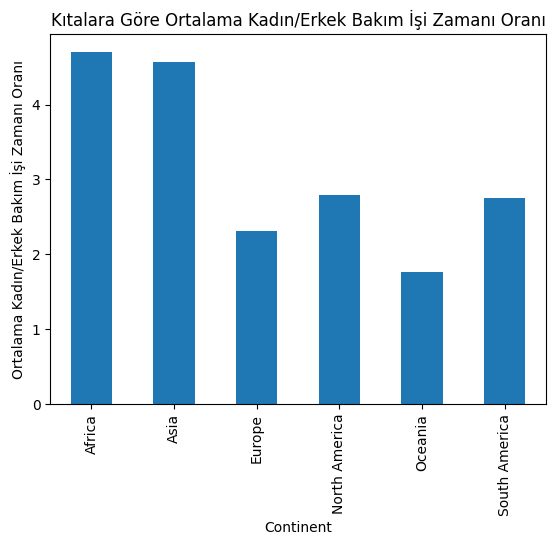

In [28]:
df_groupKitaUlke['mean'].plot(kind='bar')
plt.ylabel('Ortalama Kadın/Erkek Bakım İşi Zamanı Oranı')
plt.title('Kıtalara Göre Ortalama Kadın/Erkek Bakım İşi Zamanı Oranı')
plt.show()


In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_18/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [30]:
mapUCW = world.set_index('iso_a3').join(df_kitaUlke.set_index('Code'))

Haritadanda görüldüğü üzere dünyanın orta kesimlerinde bu oranın diğer yerlere göre yüksek olduğunu görüyoruz. Bununda sosyal-ekonomik değerlerden kaynaklandığını söyleyebiliriz.

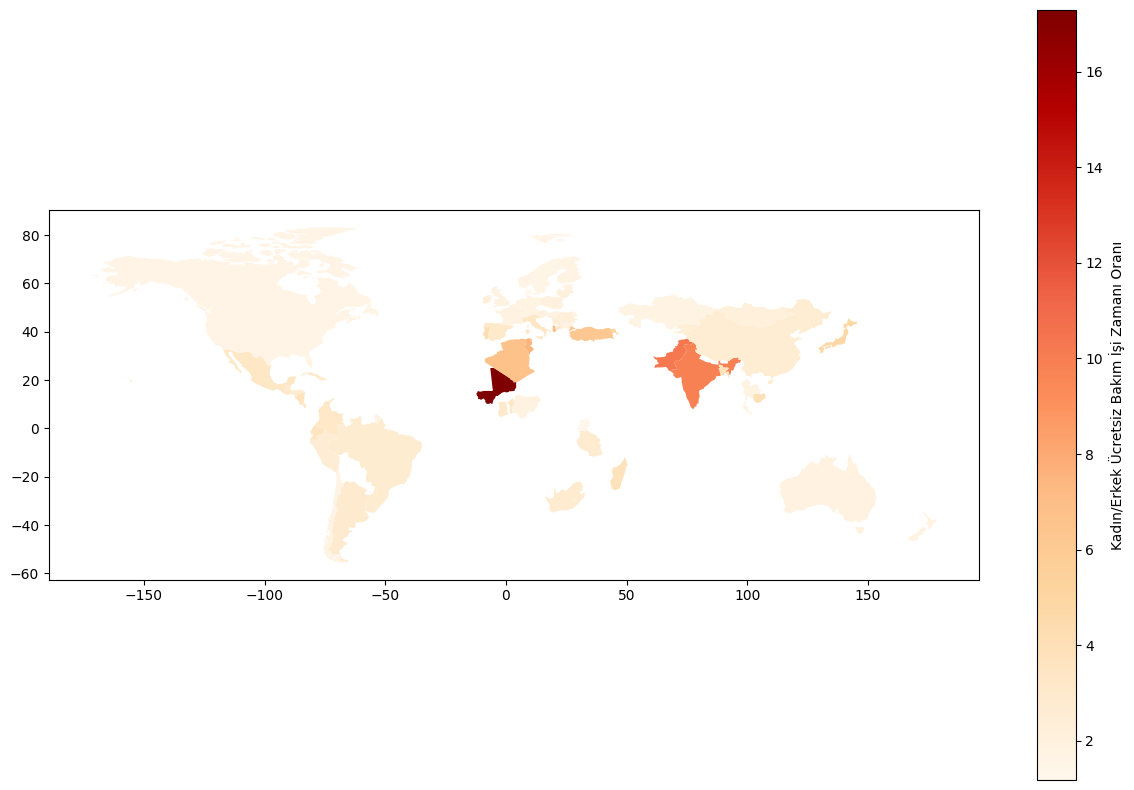

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
mapUCW.plot(column='Female to male ratio of time devoted to unpaid care work (OECD (2014))', 
            ax=ax, legend=True,
            legend_kwds={'label': "Kadın/Erkek Ücretsiz Bakım İşi Zamanı Oranı"},
            cmap='OrRd') 
plt.show()


In [32]:
df_kitaUlke.describe().T
#İlk veri setiyle arasında 1 verilik fark var. Bu da daha sonradan eklediğim Kıta
#verilerinden kaynaklanıyor. Fakat istatistiksel olarak anlamlı bir kayıp söz konusu değil.

,count,mean,std,min,25%,50%,75%,max
Year,68.0,2014.000000,0.000000,2014.00,2014.00,2014.000,2014.0000,2014.00
Female to male ratio of time devoted to unpaid care work (OECD (2014)),68.0,3.218824,2.516994,1.18,1.81,2.515,3.3725,17.29


# Share of women in top income groups
üst gelir gruplarında kadınların payı

In [33]:
df_women_top_income.head()

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
0,Australia,AUS,2000,14.2,NaN,NaN,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,NaN,NaN,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,NaN,NaN,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,NaN,NaN,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,NaN,NaN,19.6,25.5,22.2


In [34]:
df_women_top_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       168 non-null    object 
 1   Code                         148 non-null    object 
 2   Year                         168 non-null    int64  
 3   Share of women in top 0.1%   131 non-null    float64
 4   Share of women in top 0.25%  37 non-null     float64
 5   Share of women in top 0.5%   82 non-null     float64
 6   Share of women in top 1%     167 non-null    float64
 7   Share of women in top 10%    168 non-null    float64
 8   Share of women in top 5%     168 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.9+ KB


In [35]:
df_women_top_income.isnull().sum()

Entity                           0
Code                            20
Year                             0
Share of women in top 0.1%      37
Share of women in top 0.25%    131
Share of women in top 0.5%      86
Share of women in top 1%         1
Share of women in top 10%        0
Share of women in top 5%         0
dtype: int64

In [36]:
df_women_top_income["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2015, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992])

In [37]:
df_women_top_income[df_women_top_income["Code"].isnull()] 

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
148,UK,NaN,1995,9.6,9.9,9.8,10.7,19.9,15.6
149,UK,NaN,1996,8.6,10.0,12.2,13.2,20.6,16.7
150,UK,NaN,1997,10.7,13.1,12.5,13.5,21.5,17.6
151,UK,NaN,1998,10.4,10.8,12.1,13.4,21.4,17.7
152,UK,NaN,1999,10.0,10.6,11.8,13.4,21.9,18.6
153,UK,NaN,2000,9.8,11.3,12.5,13.8,21.8,18.4
154,UK,NaN,2001,10.7,11.4,12.6,14.2,23.3,18.9
155,UK,NaN,2002,9.1,11.1,12.2,14.1,23.5,19.4
156,UK,NaN,2003,9.3,11.2,12.7,14.7,24.5,20.0
157,UK,NaN,2004,9.5,11.5,12.8,15.1,25.3,21.7


United Kingdom kısaltılmış olarak >> UK olarak kullanılmış. Ülke kodu GBR olarak doldurulmalı.

In [38]:
df_women_top_income[df_women_top_income["Entity"]=="United Kingdom"] 

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%


In [39]:
df_women_top_income.loc[df_women_top_income['Entity'] == 'UK', 'Code'] = 'GBR'


In [40]:
df_women_top_income.describe().T #null gelen değerlerle birlikte

,count,mean,std,min,25%,50%,75%,max
Year,168.0,2002.202381,8.969382,1980.0,1997.000,2004.0,2009.000,2015.0
Share of women in top 0.1%,131.0,11.913740,3.275240,4.6,9.900,11.8,13.700,20.0
Share of women in top 0.25%,37.0,12.835135,1.506876,9.9,11.500,13.2,13.500,16.0
Share of women in top 0.5%,82.0,14.731707,2.942363,7.3,12.600,14.6,16.300,22.6
Share of women in top 1%,167.0,15.690419,4.361071,4.5,13.450,16.2,18.600,25.0
Share of women in top 10%,168.0,24.381548,5.352694,9.4,21.475,25.4,28.525,34.8
Share of women in top 5%,168.0,20.511905,5.070341,6.9,17.700,21.7,24.200,33.2


In [41]:
missing_data_percentage = df_women_top_income.isnull().mean() * 100
missing_data_percentage

Entity                          0.000000
Code                            0.000000
Year                            0.000000
Share of women in top 0.1%     22.023810
Share of women in top 0.25%    77.976190
Share of women in top 0.5%     51.190476
Share of women in top 1%        0.595238
Share of women in top 10%       0.000000
Share of women in top 5%        0.000000
dtype: float64

In [42]:
df_women_top_income["Entity"].unique()

array(['Australia', 'Canada', 'Denmark', 'Italy', 'New Zealand', 'Norway',
       'Spain', 'UK'], dtype=object)

In [43]:
grouped = df_women_top_income.groupby('Entity')

In [44]:
australia_group = grouped.get_group('Australia')
australia_group


,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
0,Australia,AUS,2000,14.2,NaN,NaN,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,NaN,NaN,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,NaN,NaN,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,NaN,NaN,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,NaN,NaN,19.6,25.5,22.2
5,Australia,AUS,2005,15.1,NaN,NaN,20.3,25.5,22.6
6,Australia,AUS,2006,16.8,NaN,NaN,21.5,26.0,23.4
7,Australia,AUS,2007,16.1,NaN,NaN,20.7,25.4,22.9
8,Australia,AUS,2008,16.1,NaN,NaN,20.2,25.9,22.6
9,Australia,AUS,2009,15.9,NaN,NaN,20.0,26.0,22.5


In [45]:
australia = australia_group.drop(columns=['Share of women in top 0.25%', 'Share of women in top 0.5%'])

australia

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
0,Australia,AUS,2000,14.2,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,19.6,25.5,22.2
5,Australia,AUS,2005,15.1,20.3,25.5,22.6
6,Australia,AUS,2006,16.8,21.5,26.0,23.4
7,Australia,AUS,2007,16.1,20.7,25.4,22.9
8,Australia,AUS,2008,16.1,20.2,25.9,22.6
9,Australia,AUS,2009,15.9,20.0,26.0,22.5


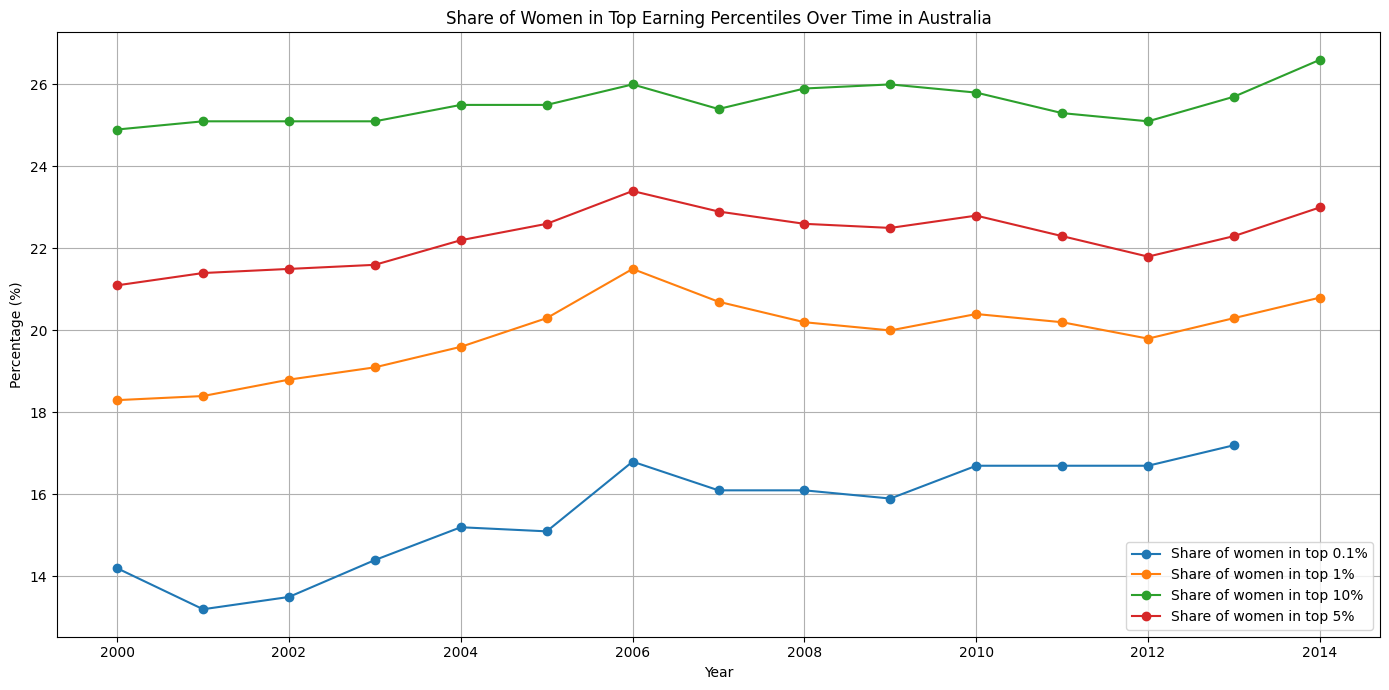

In [46]:
plt.figure(figsize=(14, 7))

percentage_columns = [column for column in australia.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(australia['Year'], australia[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Australia')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
canada_group = grouped.get_group('Canada')
canada_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
15,Canada,CAN,1993,10.4,NaN,NaN,13.5,22.2,18.6
16,Canada,CAN,1994,10.7,NaN,NaN,13.8,21.9,18.1
17,Canada,CAN,1995,10.3,NaN,NaN,14.5,22.3,18.5
18,Canada,CAN,1996,9.9,NaN,NaN,15.0,22.7,19.0
19,Canada,CAN,1997,9.9,NaN,NaN,15.4,22.7,18.9
20,Canada,CAN,1998,10.8,NaN,NaN,15.7,23.4,19.6
21,Canada,CAN,1999,11.8,NaN,NaN,16.2,23.7,19.9
22,Canada,CAN,2000,11.4,NaN,NaN,16.6,25.7,21.8
23,Canada,CAN,2001,11.5,NaN,NaN,17.2,25.2,21.3
24,Canada,CAN,2002,12.1,NaN,NaN,17.5,26.2,21.9


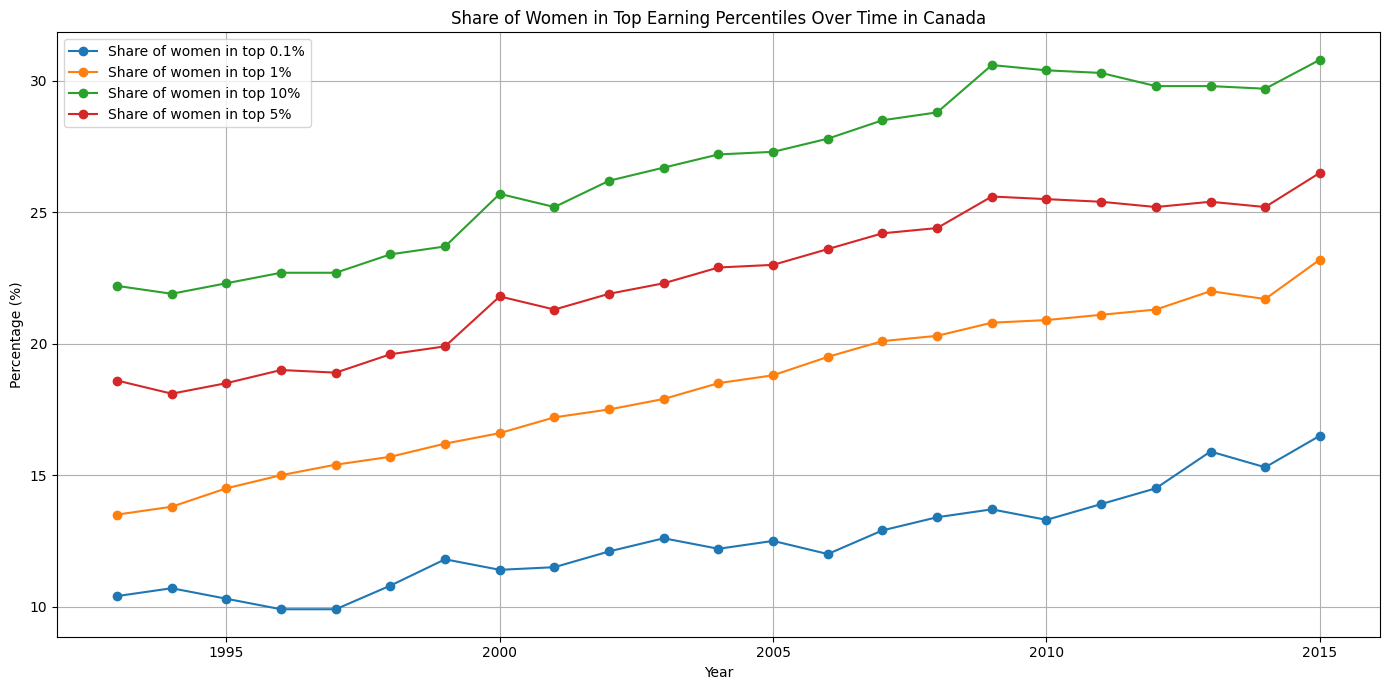

In [48]:
canada = canada_group.drop(columns=['Share of women in top 0.25%','Share of women in top 0.5%'])

plt.figure(figsize=(14, 7))

percentage_columns = [column for column in canada.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(canada['Year'], canada[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Canada')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
denmark_group = grouped.get_group('Denmark')
denmark_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
38,Denmark,DNK,1980,4.8,NaN,NaN,4.5,9.4,6.9
39,Denmark,DNK,1981,5.0,NaN,NaN,4.7,10.3,7.3
40,Denmark,DNK,1982,4.6,NaN,NaN,4.8,10.7,7.6
41,Denmark,DNK,1983,5.5,NaN,NaN,5.6,11.7,8.4
42,Denmark,DNK,1984,5.8,NaN,NaN,5.6,11.2,8.3
43,Denmark,DNK,1985,5.8,NaN,NaN,5.8,12.1,8.7
44,Denmark,DNK,1986,5.6,NaN,NaN,5.6,11.4,8.3
45,Denmark,DNK,1987,6.8,NaN,NaN,6.2,12.4,9.0
46,Denmark,DNK,1988,6.4,NaN,NaN,6.4,14.6,10.4
47,Denmark,DNK,1989,7.2,NaN,NaN,6.8,15.3,10.9


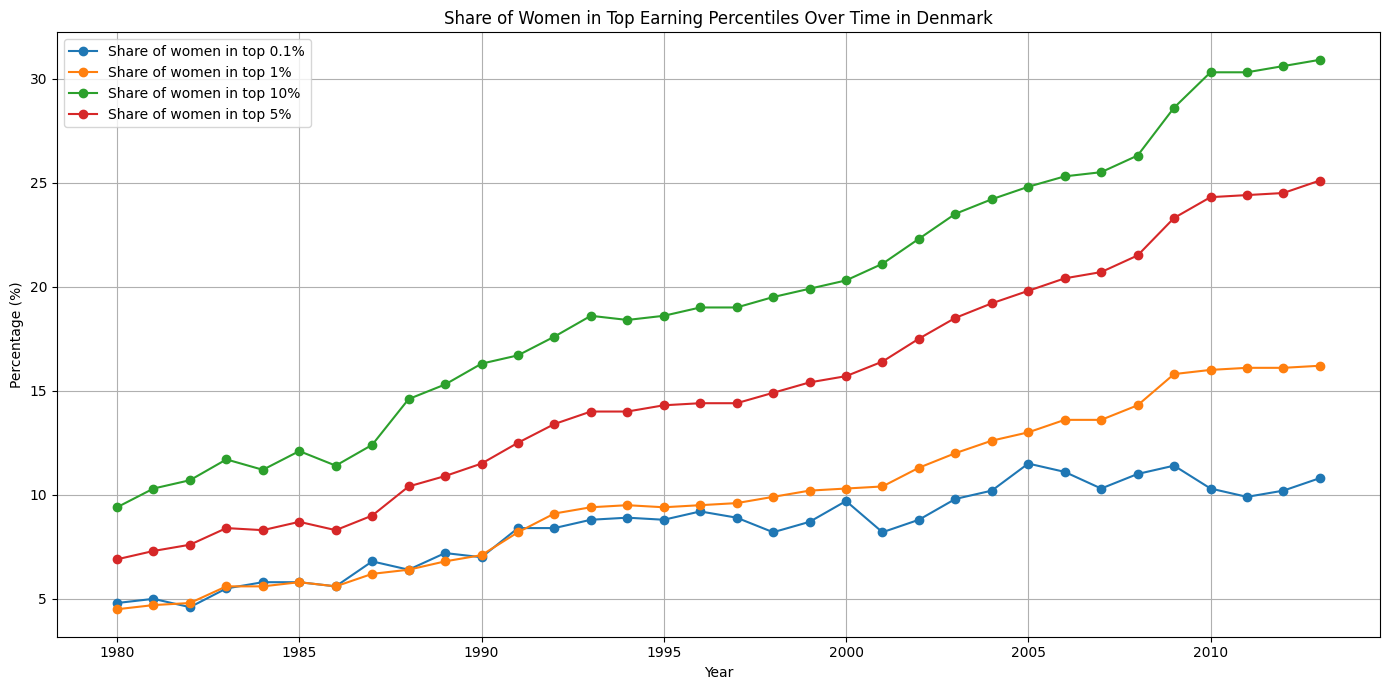

In [50]:
denmark = denmark_group.drop(columns=['Share of women in top 0.25%','Share of women in top 0.5%'])

plt.figure(figsize=(14, 7))

percentage_columns = [column for column in denmark.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(denmark['Year'], denmark[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Denmark')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
italy_group = grouped.get_group('Italy')
italy_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
72,Italy,ITA,1999,12.5,13.6,14.3,15.4,25.2,21.4
73,Italy,ITA,2000,12.3,13.3,14.1,15.5,25.3,21.7
74,Italy,ITA,2001,12.0,13.2,14.1,15.7,25.4,21.9
75,Italy,ITA,2002,12.2,13.2,14.1,15.7,25.4,21.9
76,Italy,ITA,2003,12.6,13.4,14.3,15.9,25.7,22.1
77,Italy,ITA,2004,11.7,13.0,14.2,15.8,25.6,22.3
78,Italy,ITA,2005,11.7,13.0,14.3,16.1,25.6,22.5
79,Italy,ITA,2006,12.1,13.4,14.8,16.7,26.2,22.8
80,Italy,ITA,2007,12.1,13.5,14.8,16.7,26.2,23.1
81,Italy,ITA,2008,12.0,13.4,14.9,17.0,27.2,23.5


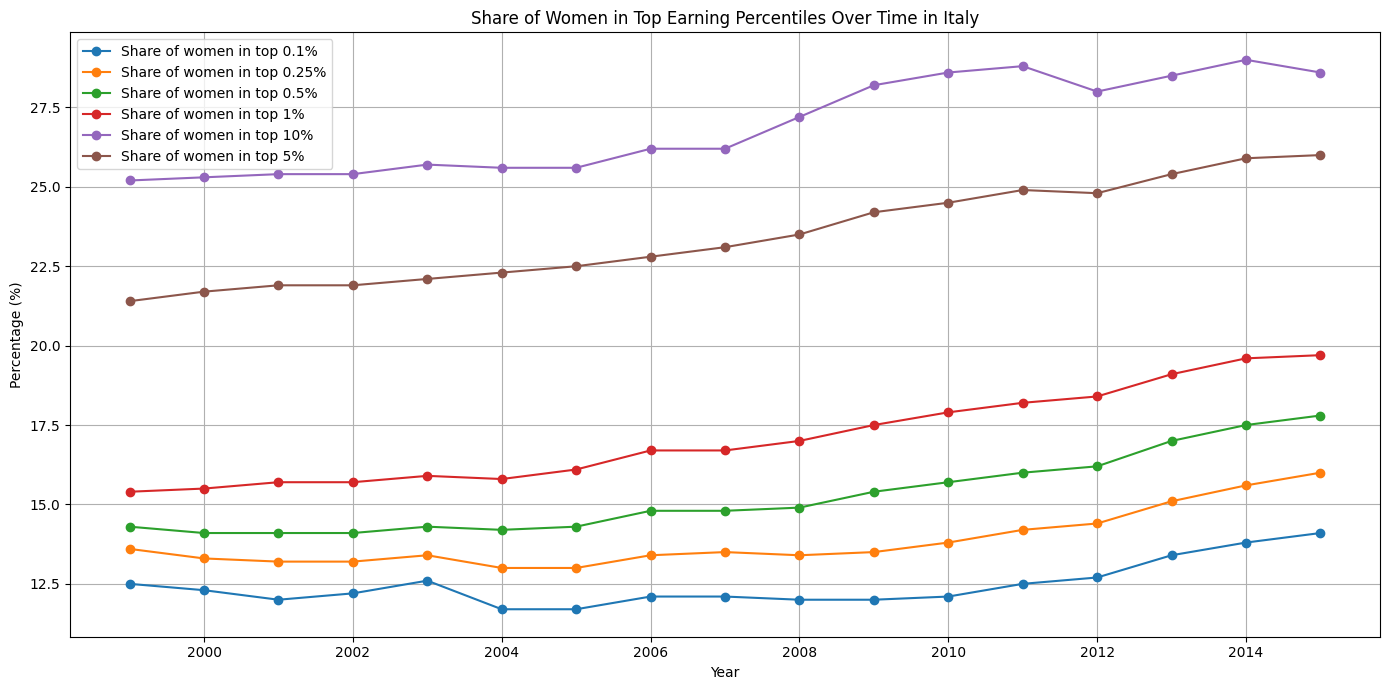

In [52]:
plt.figure(figsize=(14, 7))

percentage_columns = [column for column in italy_group.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(italy_group['Year'], italy_group[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Italy')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
nz_group = grouped.get_group('New Zealand')
nz_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
89,New Zealand,NZL,1980,NaN,NaN,8.5,9.2,11.6,10.4
90,New Zealand,NZL,1981,NaN,NaN,7.3,7.8,11.8,10.0
91,New Zealand,NZL,1982,NaN,NaN,8.2,9.5,13.5,10.7
92,New Zealand,NZL,1983,NaN,NaN,9.7,10.6,14.1,12.4
93,New Zealand,NZL,1984,NaN,NaN,10.1,12.6,15.6,14.5
94,New Zealand,NZL,1985,NaN,NaN,13.0,15.3,16.0,14.7
95,New Zealand,NZL,1986,NaN,NaN,11.8,13.1,18.1,15.9
96,New Zealand,NZL,1988,NaN,NaN,12.2,13.8,19.3,16.2
97,New Zealand,NZL,1989,NaN,NaN,15.1,16.3,20.7,18.3
98,New Zealand,NZL,1998,NaN,NaN,14.5,15.7,26.2,21.3


In [54]:
norway_group = grouped.get_group('Norway')
norway_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
125,Norway,NOR,2006,10.9,NaN,11.4,11.9,19.4,16.0
126,Norway,NOR,2007,12.6,NaN,12.5,13.1,19.9,16.6
127,Norway,NOR,2008,11.8,NaN,12.4,13.2,21.2,17.6
128,Norway,NOR,2009,11.3,NaN,11.7,12.6,20.7,17.0
129,Norway,NOR,2010,12.0,NaN,12.4,13.0,20.9,17.4
130,Norway,NOR,2011,12.5,NaN,12.6,13.5,21.2,17.7
131,Norway,NOR,2012,12.7,NaN,12.6,13.2,21.3,17.7
132,Norway,NOR,2013,13.6,NaN,13.2,13.7,21.5,17.8


Norveçte 2007 yılında endüstri %3 oranında büyümüş.Bu yüzdenin üst kesimlerde artışa sebep olduğu söylenebilir.

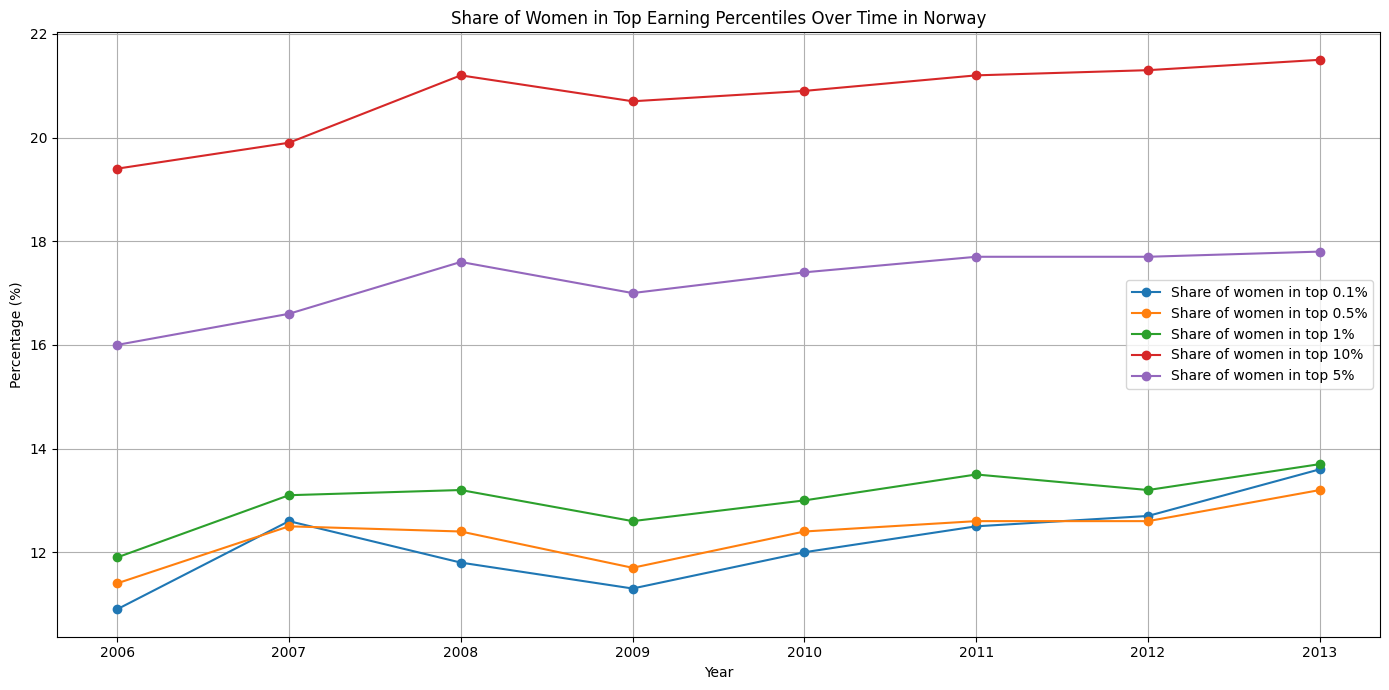

In [55]:
norway = norway_group.drop(columns=['Share of women in top 0.25%'])

plt.figure(figsize=(14, 7))

percentage_columns = [column for column in norway.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(norway['Year'], norway[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Norway')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
spain_group = grouped.get_group('Spain')
spain_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
133,Spain,ESP,1999,13.7,NaN,14.5,14.7,24.4,19.8
134,Spain,ESP,2000,13.7,NaN,14.7,15.1,24.6,20.0
135,Spain,ESP,2001,14.5,NaN,15.8,16.3,26.0,21.7
136,Spain,ESP,2002,14.8,NaN,15.9,16.5,25.4,21.4
137,Spain,ESP,2003,15.9,NaN,16.3,17.2,27.2,23.0
138,Spain,ESP,2004,16.2,NaN,17.0,18.2,29.0,25.0
139,Spain,ESP,2005,16.5,NaN,17.3,18.4,28.9,25.1
140,Spain,ESP,2006,17.7,NaN,18.3,19.4,29.6,25.7
141,Spain,ESP,2007,17.7,NaN,18.8,20.0,30.1,27.3
142,Spain,ESP,2008,18.3,NaN,19.2,20.7,31.2,27.9


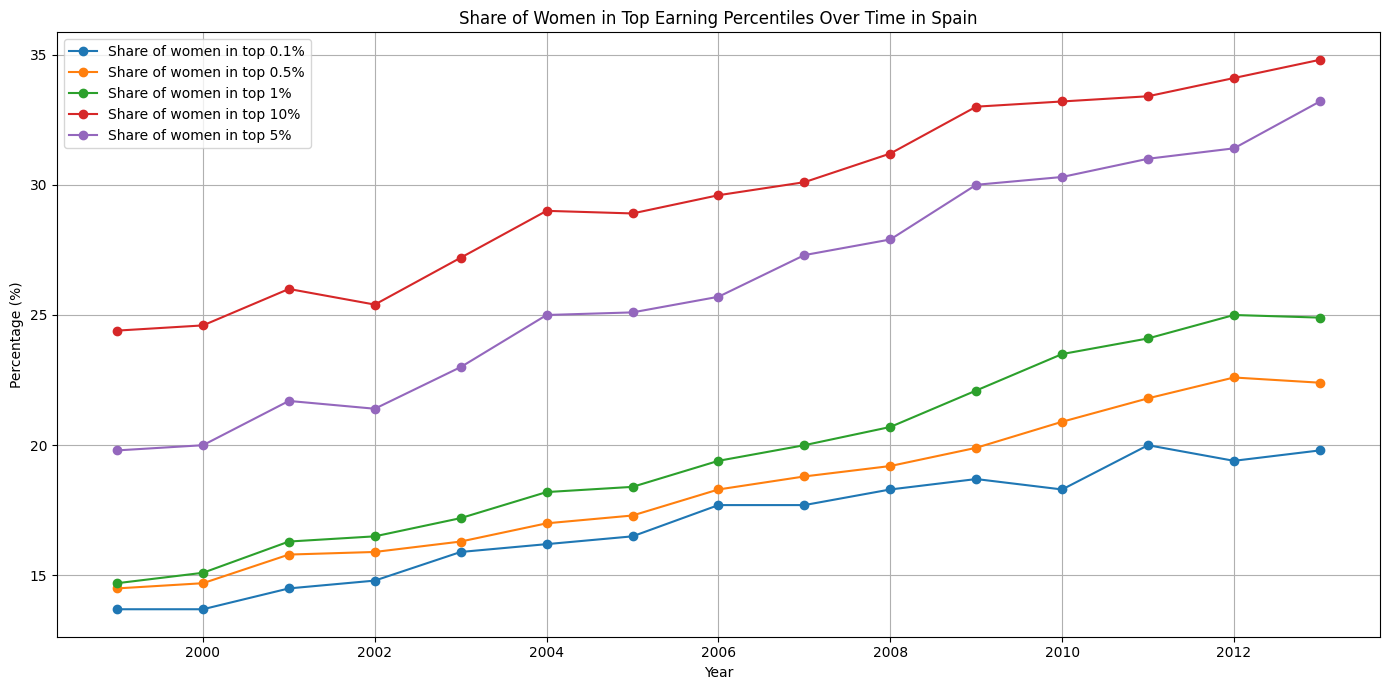

In [57]:
spain = spain_group.drop(columns=['Share of women in top 0.25%'])

plt.figure(figsize=(14, 7))

percentage_columns = [column for column in spain.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(spain['Year'], spain[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Spain')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
uk_group = grouped.get_group('UK')
uk_group

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
148,UK,GBR,1995,9.6,9.9,9.8,10.7,19.9,15.6
149,UK,GBR,1996,8.6,10.0,12.2,13.2,20.6,16.7
150,UK,GBR,1997,10.7,13.1,12.5,13.5,21.5,17.6
151,UK,GBR,1998,10.4,10.8,12.1,13.4,21.4,17.7
152,UK,GBR,1999,10.0,10.6,11.8,13.4,21.9,18.6
153,UK,GBR,2000,9.8,11.3,12.5,13.8,21.8,18.4
154,UK,GBR,2001,10.7,11.4,12.6,14.2,23.3,18.9
155,UK,GBR,2002,9.1,11.1,12.2,14.1,23.5,19.4
156,UK,GBR,2003,9.3,11.2,12.7,14.7,24.5,20.0
157,UK,GBR,2004,9.5,11.5,12.8,15.1,25.3,21.7


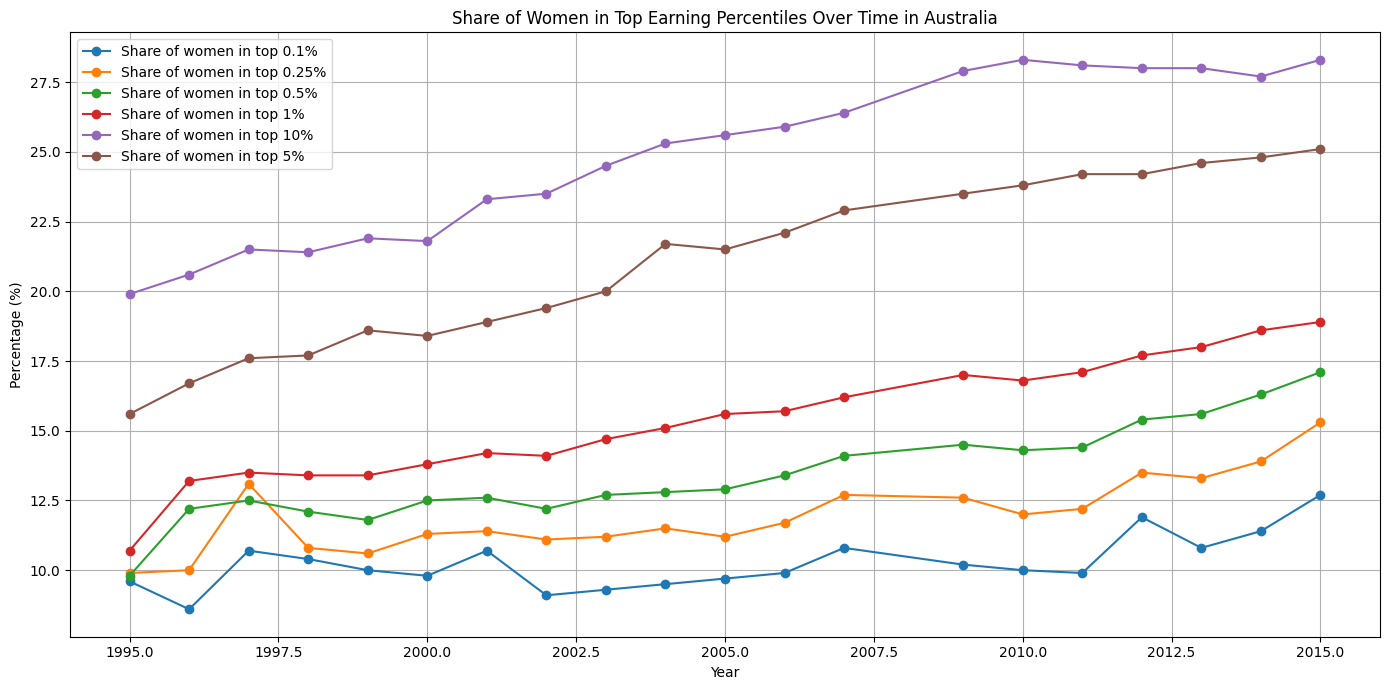

In [59]:
plt.figure(figsize=(14, 7))

percentage_columns = [column for column in uk_group.columns if 'Share of women' in column]

for column in percentage_columns:
    plt.plot(uk_group['Year'], uk_group[column], marker='o', label=column)

plt.title('Share of Women in Top Earning Percentiles Over Time in Australia')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Bu datasette verilerimizin çoğunluğuna baktığımıda 0.25'lik yüzdedeli kadınların çoğunun bilgisi girilmemiş. Elimizde herhangi bir bilgi olmadığı içinde bunları bir ortalama vs. gibi değerlerle doldurmak mümkün değil. Kendi aralarında karşılaştırma analiz vs yapabiliriz.

Ülkelere tek tek bakarsak ise zamanala bir artış mevcut. Yer yer dalgalanmalar olmuş. Buda ülkenin o sıradaki gelişmelerinden kaynaklı olabilir.

# Ratio of female to male labor force participation rates

Kadınların erkeklere göre işgücüne katılım oranı
Kadınların erkeklere göre işgücüne katılım oranı, ekonominin belirli bir kesiminde çalışan veya iş arayan kadınların sayısının, aynı kategorilerdeki erkeklerin sayısına oranını ifade eder. Bu oran yüzde olarak verilir. Örneğin, eğer bir ülkede 100 erkek çalışıyor veya iş arıyorsa ve aynı durumda 50 kadın varsa, kadınların erkeklere göre işgücüne katılım oranı %50 olur.

Veri setindeki oranlar, yıllara göre küçük artışlar gösteriyor. Diyelim ki 1990 yılında bu oran %19.60 iken, 1994 yılında %19.88’e yükselmiş. Bu, o yıllar arasında kadınların işgücüne katılımının yavaş yavaş arttığını gösteriyor.

In [60]:
df_labor_force_ratio.head()

,Entity,Code,Year,Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
0,Afghanistan,AFG,1990,19.604805
1,Afghanistan,AFG,1991,19.713380
2,Afghanistan,AFG,1992,19.803307
3,Afghanistan,AFG,1993,19.844606
4,Afghanistan,AFG,1994,19.884710


In [61]:
df_labor_force_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Data columns (total 4 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6432 non-null   object 
 1   Code                                                                               5984 non-null   object 
 2   Year                                                                               6432 non-null   int64  
 3   Ratio of female to male labor force participation rate (%) (modeled ILO estimate)  6432 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 201.1+ KB


In [62]:
df_labor_force_ratio[df_labor_force_ratio["Code"].isnull()]["Entity"].unique()


array(['East Asia and Pacific (WB)', 'Europe and Central Asia (WB)',
       'European Union (27)', 'High-income countries',
       'Latin America and Caribbean (WB)', 'Low-income countries',
       'Lower-middle-income countries',
       'Middle East and North Africa (WB)', 'Middle-income countries',
       'North America (WB)', 'South Asia (WB)', 'Sub-Saharan Africa (WB)',
       'Upper-middle-income countries', 'West Bank and Gaza'],
      dtype=object)

In [63]:
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'East Asia and Pacific (WB)', 'Code'] = 'EAS'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'Europe and Central Asia (WB)', 'Code'] = 'ECA'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'European Union (27)', 'Code'] = 'EU'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'European Union (27)', 'Code'] = 'EU'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'Latin America and Caribbean (WB)', 'Code'] = 'LAC'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'Middle East and North Africa (WB)', 'Code'] = 'MENA'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'Sub-Saharan Africa (WB)', 'Code'] = 'SSA'
df_labor_force_ratio.loc[df_labor_force_ratio['Entity'] == 'West Bank and Gaza', 'Code'] = 'PS'


In [64]:
df_labor_force_ratio.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6432.0,2005.500000,9.23381,1990.000000,1997.750000,2005.50000,2013.250000,2021.00000
Ratio of female to male labor force participation rate (%) (modeled ILO estimate),6432.0,68.871932,19.95326,8.863492,57.790668,73.68534,83.291803,108.37153


In [65]:
pivot_df = df_labor_force_ratio.pivot(index='Entity', columns='Year', values='Ratio of female to male labor force participation rate (%) (modeled ILO estimate)')

yearly_change_rates = pivot_df.pct_change(axis='columns') * 100

yearly_change_rates.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.553818,0.456172,0.208546,0.202090,0.583765,-0.988931,-0.981059,-0.740803,-0.483799,...,3.071439,6.926456,6.889967,6.849592,6.811924,6.760422,1.858369,1.818432,-17.740827,-9.572659
Albania,NaN,2.813998,0.652083,-0.913608,-0.773017,-1.112853,-0.739799,0.877478,-0.729581,-0.944838,...,-3.732783,-4.750941,-2.563433,5.605652,4.545505,-2.794308,2.150483,2.244135,-2.533338,1.096537
Algeria,NaN,0.579054,0.972305,0.715429,0.974207,1.653147,1.742429,2.103243,2.121983,2.133556,...,6.433660,2.492955,-1.510099,3.680806,4.460351,-0.838992,-0.832565,-0.700196,-3.029674,0.827710
Angola,NaN,-0.130271,-0.063756,-0.002387,0.056508,0.114132,-0.020294,0.050092,0.110335,0.157777,...,-0.066150,-0.011353,0.035889,0.086924,0.071657,0.129129,0.186784,0.243353,-0.959060,0.128529
Argentina,NaN,2.282456,2.090353,2.220795,1.571906,-0.803556,1.408502,2.024704,0.907421,-0.997640,...,1.199777,-0.299496,0.700575,0.911464,0.923848,0.939874,3.013985,1.004917,0.115165,-0.958032


In [66]:
pivot_df = df_labor_force_ratio.pivot(index='Entity', columns='Year', 
                                      values='Ratio of female to male labor force participation rate (%) (modeled ILO estimate)')

yearly_change_rates = pivot_df.pct_change(axis='columns') * 100

volatility = yearly_change_rates.std(axis=1).sort_values(ascending=False)

volatility_df = pd.DataFrame(volatility, columns=['Volatility'])

volatility_df.head()  # En yüksek volatiliteye sahip ilk 5 ülkeyi gösterelim.


,Volatility
Entity,
Iran,6.558584
Syria,6.409062
Saudi Arabia,5.991467
Pakistan,5.973205
Turkey,5.817007


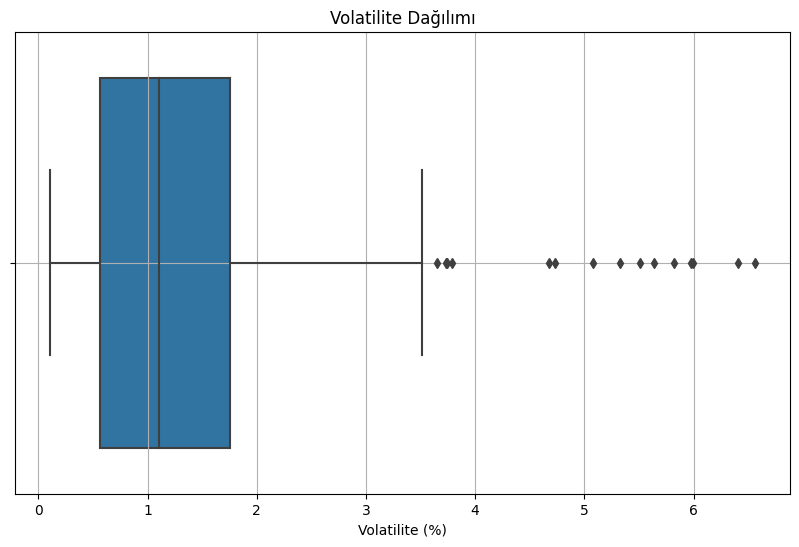

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=volatility_df['Volatility'])
plt.title('Volatilite Dağılımı')
plt.xlabel('Volatilite (%)')
plt.grid(True)
plt.show()

In [68]:
Q1 = volatility_df['Volatility'].quantile(0.25)
Q3 = volatility_df['Volatility'].quantile(0.75)
IQR = Q3 - Q1
outliers = volatility_df[(volatility_df['Volatility'] < (Q1 - 1.5 * IQR))| #-1.2160043424927096
                         (volatility_df['Volatility'] > (Q3 + 1.5 * IQR))] #3.5423688538109497

outliers

,Volatility
Entity,
Iran,6.558584
Syria,6.409062
Saudi Arabia,5.991467
Pakistan,5.973205
Turkey,5.817007
Yemen,5.634537
Egypt,5.510200
West Bank and Gaza,5.322943
Iraq,5.078586


Yüksek volatilite değeri, bir ülkenin iş gücü piyasasında büyük ve hızlı değişikliklerin yaşandığını gösterir. Bu, ekonomik istikrarsızlık, sosyal ve politik değişiklikler, sektörel değişimler, demografik faktörler veya uluslararası etkiler gibi çeşitli nedenlerle olabilir.

# Maternal mortality

Tanım: Anne ölüm oranı (MMR), belirli bir zaman diliminde, aynı zaman diliminde 100.000 canlı doğum başına düşen anne ölümlerinin sayısı olarak tanımlanır.

In [69]:
df_maternal_mortality.head()

,Entity,Code,Year,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))
0,Afghanistan,AFG,2000,1450.0
1,Afghanistan,AFG,2001,1390.0
2,Afghanistan,AFG,2002,1300.0
3,Afghanistan,AFG,2003,1240.0
4,Afghanistan,AFG,2004,1180.0


In [70]:
df_maternal_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             5800 non-null   object 
 1   Code                                                               5548 non-null   object 
 2   Year                                                               5800 non-null   int64  
 3   Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))  5800 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 181.4+ KB


In [71]:
df_maternal_mortality[df_maternal_mortality["Code"].isnull()]

,Entity,Code,Year,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))
875,Caribbean small states,NaN,2000,112.0
876,Caribbean small states,NaN,2001,109.0
877,Caribbean small states,NaN,2002,109.0
878,Caribbean small states,NaN,2003,107.0
879,Caribbean small states,NaN,2004,105.0
...,...,...,...,...
5633,Upper middle income (WB),NaN,2013,44.0
5634,Upper middle income (WB),NaN,2014,44.0
5635,Upper middle income (WB),NaN,2015,43.0
5636,Upper middle income (WB),NaN,2016,42.0


In [72]:
df_maternal_mortality[df_maternal_mortality["Code"].isnull()]["Entity"].unique()


array(['Caribbean small states', 'East Asia & Pacific (WB)',
       'Europe & Central Asia (WB)', 'High income (WB)',
       'Latin America & Caribbean (WB)', 'Low & middle income (WB)',
       'Low income (WB)', 'Lower middle income (WB)',
       'Middle East & North Africa (WB)', 'Middle income (WB)',
       'North America (WB)', 'South Asia (WB)', 'Sub-Saharan Africa (WB)',
       'Upper middle income (WB)'], dtype=object)

In [73]:
unique_identifiers = {
    'Caribbean small states': 'CSS',
    'East Asia & Pacific (WB)': 'EAP-WB',
    'Europe & Central Asia (WB)': 'ECA-WB',
    'High income (WB)': 'HI-WB',
    'Latin America & Caribbean (WB)': 'LAC-WB',
    'Low & middle income (WB)': 'LMI-WB',
    'Low income (WB)': 'LI-WB',
    'Lower middle income (WB)': 'LMI-WB',
    'Middle East & North Africa (WB)': 'MENA-WB',
    'Middle income (WB)': 'MI-WB',
    'North America (WB)': 'NA-WB',
    'South Asia (WB)': 'SA-WB',
    'Sub-Saharan Africa (WB)': 'SSA-WB',
    'Upper middle income (WB)': 'UMI-WB'
}
for entity, code in unique_identifiers.items():
    df_maternal_mortality.loc[df_maternal_mortality["Entity"] == entity, "Code"] = code

missing_after_filling = df_maternal_mortality["Code"].isnull().sum()
sample_after_filling = df_maternal_mortality[df_maternal_mortality["Entity"].isin(unique_identifiers.keys())].head()

missing_after_filling, sample_after_filling


(0,
                      Entity Code  Year  \
 875  Caribbean small states  CSS  2000   
 876  Caribbean small states  CSS  2001   
 877  Caribbean small states  CSS  2002   
 878  Caribbean small states  CSS  2003   
 879  Caribbean small states  CSS  2004   
 
      Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))  
 875                                              112.0                  
 876                                              109.0                  
 877                                              109.0                  
 878                                              107.0                  
 879                                              105.0                  )

* Araştırıldığında çoğu modern sağlık istatistiği, özellikle detaylı ve güvenilir anne ölüm oranı gibi spesifik veriler, genellikle 20. yüzyılın başlarından itibaren toplanmaya başlanıldığı görülmüştür. Daha eski tarihli veriler, genellikle tahminlere dayanır ve belirli bir bölge için kayıtlı tarihi olaylara, nüfus sayımlarına veya diğer tarihsel kaynaklara dayanarak yapılan genel tahminlerdir.
* Ayrıca 20. yüzyılın başlarındaki veriler, modern sağlık hizmetlerinin gelişimini yansıtmayabilir. Son yüzyılda sağlık teknolojisinde ve politikalarında yaşanan ilerlemeler, özellikle 1960'lardan sonra, daha etkili bir analiz için daha alakalı olabilir.

In [74]:
df_maternal_mortality["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1875, 1885, 1895, 1903,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2018, 2019, 2020, 1851, 1855,
       1858, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1874,
       1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 18

In [75]:
df_maternal_mortality = df_maternal_mortality[df_maternal_mortality["Year"] >= 1960]


unique_years_after_1960_filtering = df_maternal_mortality["Year"].unique()
filtered_data_shape_1960_onwards = df_maternal_mortality.shape

unique_years_after_1960_filtering, filtered_data_shape_1960_onwards


(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 1960, 1961, 1962, 1963,
        1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
        1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
        1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
        1997, 1998, 1999, 2018, 2019, 2020]),
 (4819, 4))

HIV/AIDS salgını, 1980'lerin başında fark edildi ve 2000 yılında da devam ediyordu. Ancak, HIV/AIDS'in global anne ölüm oranları üzerindeki etkisi, bu hastalığın özellikle Afrika kıtasında yaygın olduğu bazı bölgelerde daha belirgindi. Veri setindeki ani bir artış, bu tür bir salgının ölüm oranları üzerindeki etkisini yansıtmış olabilir.Ancak, böylesine keskin bir artış aynı zamanda bir veri giriş hatası veya veri toplama metodolojisinde bir değişikliği de işaret edebilir.

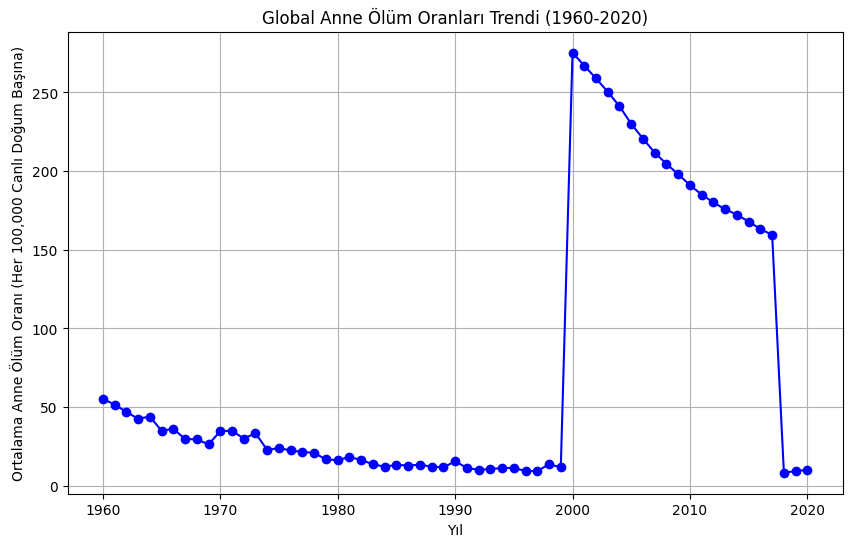

In [76]:
global_mmr_avg_1960_onwards = df_maternal_mortality.groupby("Year")["Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))"].mean()

# Trendi görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(global_mmr_avg_1960_onwards.index, global_mmr_avg_1960_onwards, marker='o', linestyle='-', color='blue')
plt.title("Global Anne Ölüm Oranları Trendi (1960-2020)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Anne Ölüm Oranı (Her 100,000 Canlı Doğum Başına)")
plt.grid(True)
plt.show()


Sahra Altı Afrika ve Güney Asya ülkelerinde hala yüksek anne ölüm oranlarının olduğunu göstermektedir. Yüksek ölüm oranlarının nedenleri arasında eğitimsizlik, savaşlar ve iç çatışmalar, yüksek yoksulluk oranları, yetersiz sağlık hizmetleri ve kadınların sosyal statüsündeki düşüklük yer alabilir. Bu sonuçlar, belirli bölgelerde sağlık hizmetlerinin iyileştirilmesi ve kadın sağlığına daha fazla kaynak ayırmanın gerekli olduğunu göstermektedir.

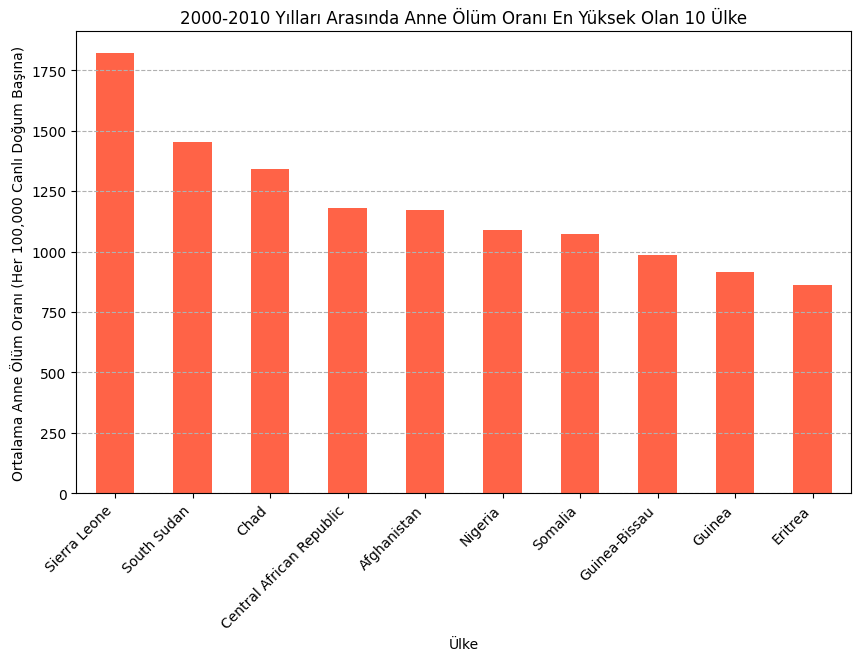

Entity
Sierra Leone                1819.090909
South Sudan                 1452.727273
Chad                        1340.000000
Central African Republic    1179.090909
Afghanistan                 1171.545455
Nigeria                     1088.272727
Somalia                     1072.636364
Guinea-Bissau                987.000000
Guinea                       914.000000
Eritrea                      862.454545
Name: Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015)), dtype: float64

In [77]:
mmr_2000_2010_avg = df_maternal_mortality[(df_maternal_mortality["Year"] >= 2000) & (df_maternal_mortality["Year"] <= 2010)].groupby("Entity")["Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))"].mean()

top_10_countries = mmr_2000_2010_avg.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='tomato')
plt.title("2000-2010 Yılları Arasında Anne Ölüm Oranı En Yüksek Olan 10 Ülke")
plt.xlabel("Ülke")
plt.ylabel("Ortalama Anne Ölüm Oranı (Her 100,000 Canlı Doğum Başına)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

top_10_countries


Grafik, gelir seviyesinin artışıyla birlikte anne ölüm oranlarının nasıl düştüğünü ve sağlık hizmetlerine erişim ile sağlık politikalarının önemini vurguluyor

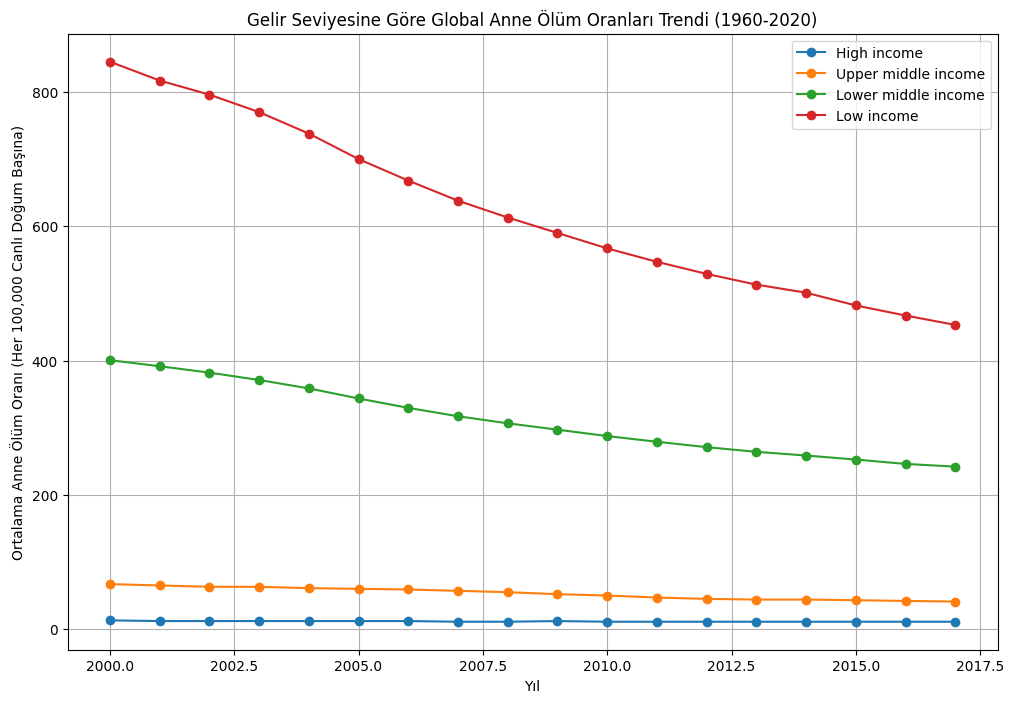

In [78]:
income_groups = {
    'High income': ['HI-WB'],
    'Upper middle income': ['UMI-WB'],
    'Lower middle income': ['LMI-WB'],
    'Low income': ['LI-WB']
}

mmr_by_income_group = {}

for group_name, codes in income_groups.items():
    filtered_data = df_maternal_mortality[df_maternal_mortality['Code'].isin(codes)]
    yearly_avg = filtered_data.groupby("Year")["Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))"].mean()
    mmr_by_income_group[group_name] = yearly_avg

plt.figure(figsize=(12, 8))

for group_name, yearly_avg in mmr_by_income_group.items():
    plt.plot(yearly_avg.index, yearly_avg, marker='o', linestyle='-', label=group_name)

plt.title("Gelir Seviyesine Göre Global Anne Ölüm Oranları Trendi (1960-2020)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Anne Ölüm Oranı (Her 100,000 Canlı Doğum Başına)")
plt.legend()
plt.grid(True)
plt.show()


# Gender gap in average wages

cinsiyete dayalı ücret farkı

In [79]:
df_gender_wage_gap.head()

,Entity,Code,Year,Gender wage gap (%)
0,Argentina,ARG,1986,15.79
1,Argentina,ARG,1987,12.50
2,Argentina,ARG,1988,11.31
3,Argentina,ARG,1991,6.71
4,Argentina,ARG,1992,8.33


In [80]:
df_gender_wage_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               413 non-null    object 
 1   Code                 413 non-null    object 
 2   Year                 413 non-null    int64  
 3   Gender wage gap (%)  413 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.0+ KB


Herhangi bir NaN değer var mı kontrol edelim

Herhangi bir NaN değerimiz yok. Kaç benzersiz Code, Entity ve Year değerimiz var ona bakalım.

Her yıldan kaçar adet var bakalım. Ama önce bunun için max ve min değerleri bulalım. Daha sonra da minimumdan maximuma her yıldan kaç adet mevcut onu bulalım

In [81]:
min_year_gender_wage_gap = df_gender_wage_gap['Year'].min()
max_year_gender_wage_gap = df_gender_wage_gap['Year'].max()

print(f"Minimum yıl: {min_year_gender_wage_gap}")
print(f"Maksimum yıl: {max_year_gender_wage_gap}")




Minimum yıl: 1981
Maksimum yıl: 2016


In [82]:
year_counts_gender_wage_gap = df_gender_wage_gap['Year'].value_counts().sort_index()

print(year_counts_gender_wage_gap)

Year
1981     1
1982     1
1983     1
1984     1
1985     1
1986     2
1987     2
1988     2
1989     6
1990     4
1991     4
1992     9
1993     7
1994     5
1995     7
1996     9
1997    11
1998    12
1999    12
2000    12
2001    15
2002    25
2003    12
2004    12
2005    14
2006    26
2007    13
2008    15
2009    17
2010    28
2011    16
2012    18
2013    19
2014    51
2015    13
2016    10
Name: count, dtype: int64


64 ülke var ve 64 ülkenin de verilerinin bulunduğu ortak bir yıl bulamadık.

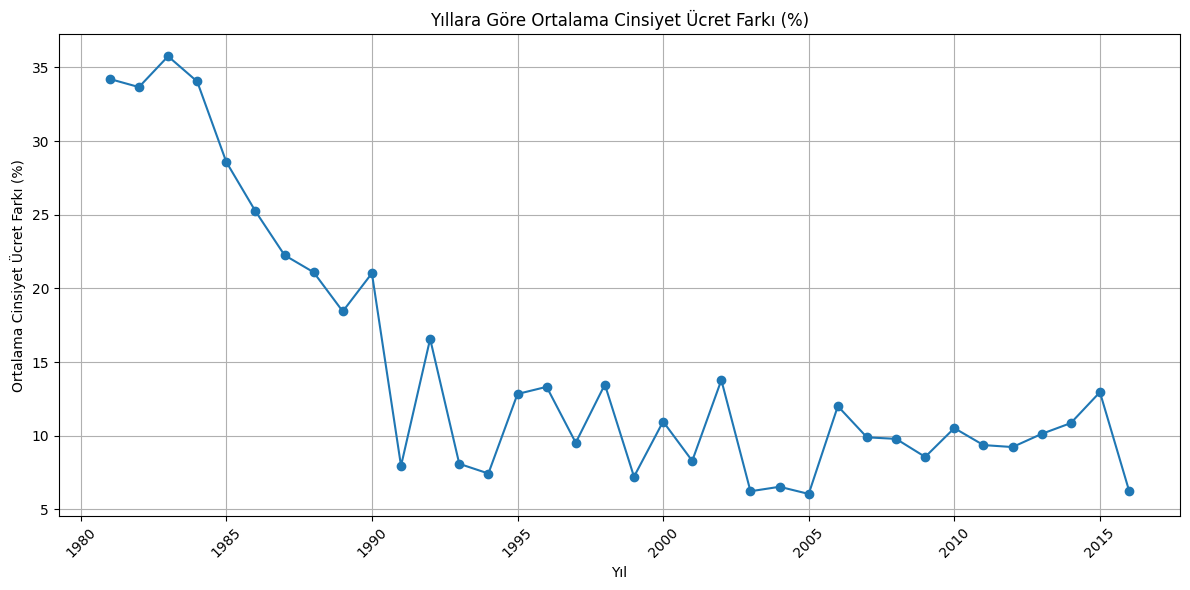

In [83]:
average_gap_by_year = df_gender_wage_gap.groupby('Year')['Gender wage gap (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_gap_by_year['Year'], average_gap_by_year['Gender wage gap (%)'], marker='o')
plt.title('Yıllara Göre Ortalama Cinsiyet Ücret Farkı (%)')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Cinsiyet Ücret Farkı (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En düşük cinsiyet ücret farkına sahip ülkeler negatif değerlere sahipken, en yüksek farka sahip ülkeler pozitif değerler gösteriyor. Negatif değerler, kadınların ortalama olarak erkeklerden daha fazla kazandığını gösterirken, pozitif değerler erkeklerin kadınlardan daha fazla kazandığını işaret ediyor. Fakar negatif değerin -21.57 olması arada az ücret farkı olduğunu göstermez. Burada da bir cinsiyet eşitsizliğinden söz edebiliriz.

In [84]:
latest_year = df_gender_wage_gap['Year'].max()
latest_year_data = df_gender_wage_gap[df_gender_wage_gap['Year'] == latest_year].sort_values(by='Gender wage gap (%)', ascending=True)

lowest_gap_countries = latest_year_data.head()
highest_gap_countries = latest_year_data.tail()

lowest_gap_countries

,Entity,Code,Year,Gender wage gap (%)
373,Thailand,THA,2016,-21.57
40,Belize,BLZ,2016,-20.03
165,Ecuador,ECU,2016,-2.80
347,Romania,ROU,2016,6.61
345,Portugal,PRT,2016,8.54


In [85]:
highest_gap_countries

,Entity,Code,Year,Gender wage gap (%)
412,Vietnam,VNM,2016,10.71
279,Pakistan,PAK,2016,10.81
186,Finland,FIN,2016,16.34
133,Czechia,CZE,2016,20.61
362,South Korea,KOR,2016,33.59


* Koyu mavi renkler negatif değerleri (kadınların erkeklerden daha fazla kazandığı durumları) temsil ederken, kırmızı ve turuncu tonları pozitif cinsiyet ücret farkını (erkeklerin kadınlardan daha fazla kazandığı durumları) gösteriyor.
* Genel bir gözlemle, cinsiyet ücret farkının zaman içinde azalmakta olduğunu söyleyebiliriz. Ancak bu azalma hızı ve eşitliğe ulaşma durumu ülkeden ülkeye değişiklik gösteriyor. Bazı ülkelerin diğerlerine kıyasla daha hızlı ilerleme kaydettiğini veya zaten daha eşit bir durumda başladıklarını görebiliriz

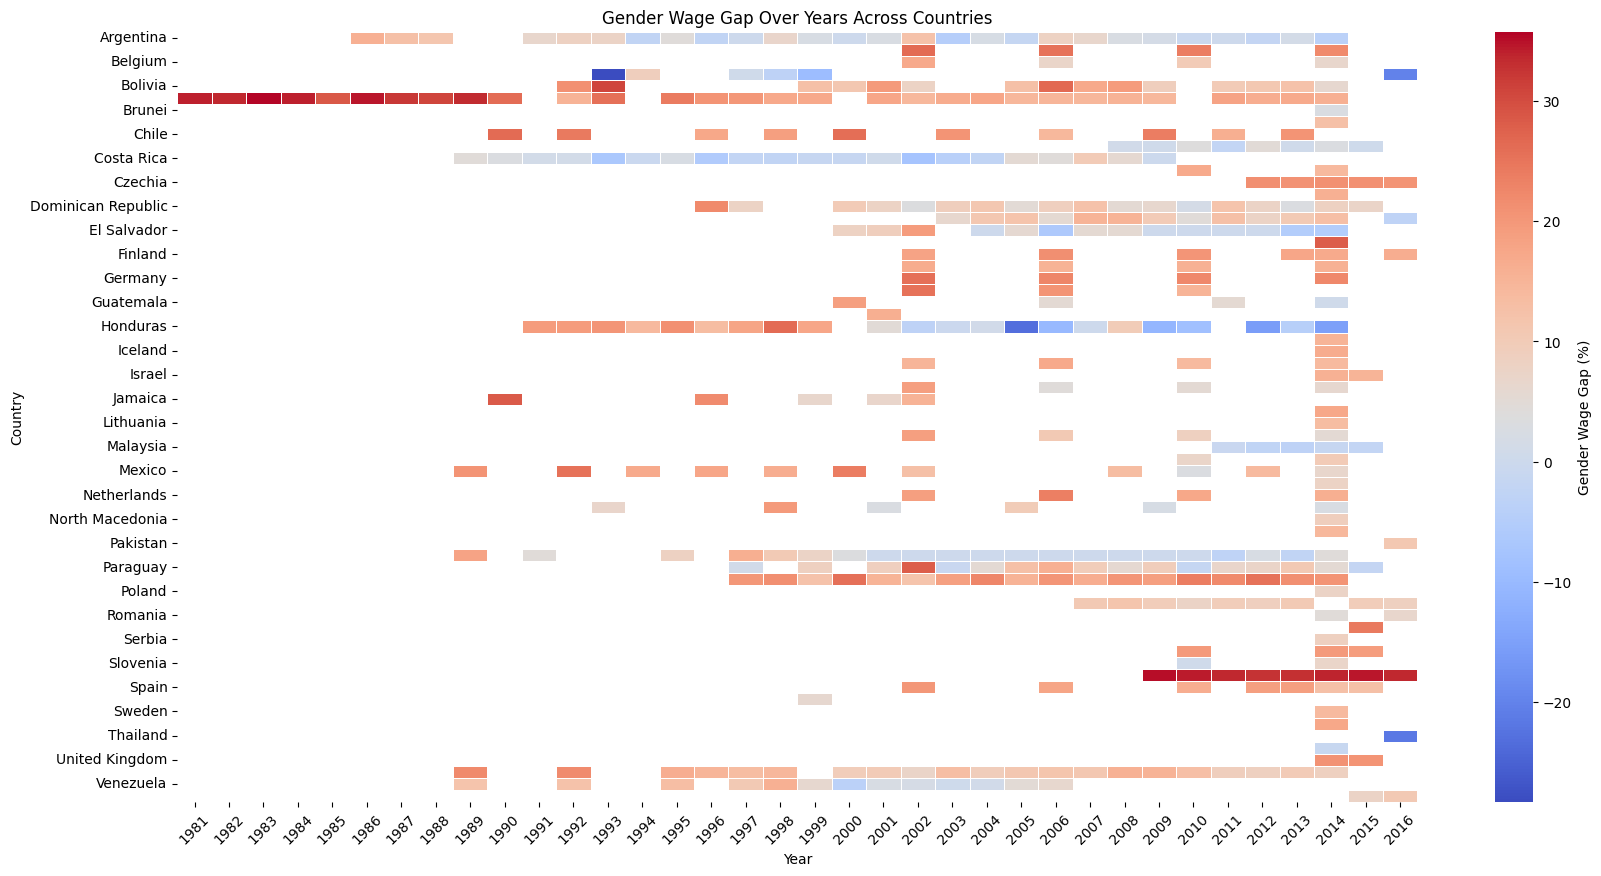

In [86]:
heatmap_data = df_gender_wage_gap.pivot_table(values='Gender wage gap (%)', index='Entity', columns='Year')
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Gender Wage Gap (%)'})
plt.title('Gender Wage Gap Over Years Across Countries')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

In [87]:
df_kitaUlkeUcret=pd.merge(df_gender_wage_gap, df_kita, on='Entity')
df_kitaUlkeUcret

,Entity,Code,Year,Gender wage gap (%),Continent
0,Argentina,ARG,1986,15.79,South America
1,Argentina,ARG,1987,12.50,South America
2,Argentina,ARG,1988,11.31,South America
3,Argentina,ARG,1991,6.71,South America
4,Argentina,ARG,1992,8.33,South America
...,...,...,...,...,...
403,Venezuela,VEN,2004,0.77,South America
404,Venezuela,VEN,2005,5.10,South America
405,Venezuela,VEN,2006,6.43,South America
406,Vietnam,VNM,2015,7.69,Asia


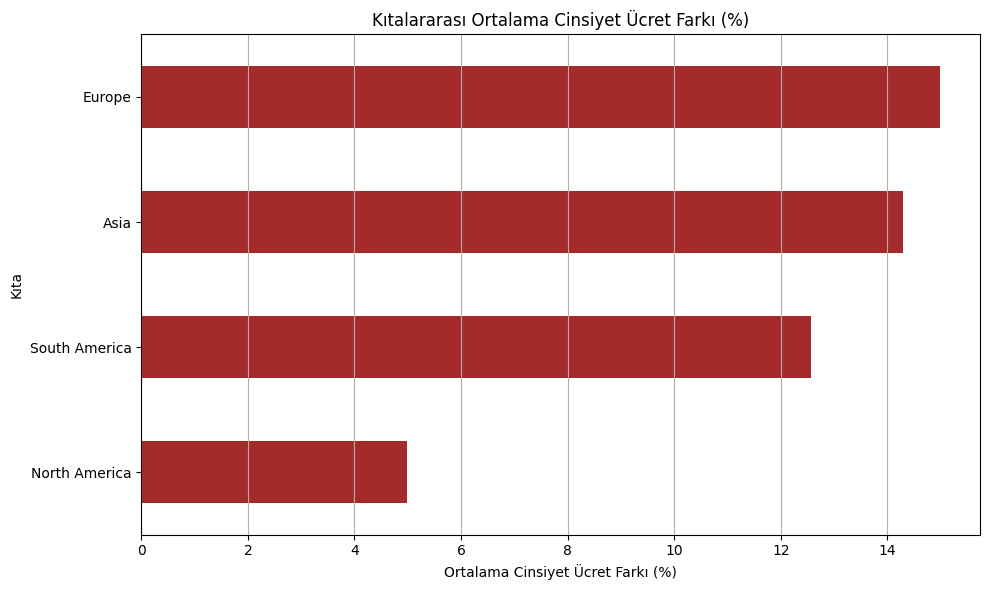

In [88]:
continent_gap_means = df_kitaUlkeUcret.groupby('Continent')['Gender wage gap (%)'].mean().sort_values()
plt.figure(figsize=(10, 6))
continent_gap_means.plot(kind='barh', color='brown')
plt.title('Kıtalararası Ortalama Cinsiyet Ücret Farkı (%)')
plt.xlabel('Ortalama Cinsiyet Ücret Farkı (%)')
plt.ylabel('Kıta')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Labor Force Women Entrpreneurship

In [89]:
df_women_entr.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [90]:
df_women_entr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


Benzersiz değerlerin neler olduğuna bakalım.

In [91]:
unique_values_country_women_entr = df_women_entr['Country'].unique()
print(f"'Country' sütunundaki benzersiz değerler: {unique_values_country_women_entr}")

unique_values_lod_women_entr = df_women_entr['Level of development'].unique()
print(f"'Level of development' sütunundaki benzersiz değerler: {unique_values_lod_women_entr}")

unique_values_eum_women_entr = df_women_entr['European Union Membership'].unique()
print(f"'European Union Membership' sütunundaki benzersiz değerler: {unique_values_eum_women_entr}")

unique_values_currency_women_entr = df_women_entr['Currency'].unique()
print(f"'Currency' sütunundaki benzersiz değerler: {unique_values_currency_women_entr}")


'Country' sütunundaki benzersiz değerler: ['Austria' 'Belgium' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Netherlands' 'Slovakia'
 'Slovenia' 'Spain' 'Croatia' 'Denmark' 'Hungary' 'Poland' 'Sweden'
 'Australia' 'Iceland' 'Japan' 'Norway' 'Singapore' 'Switzerland' 'Taiwan'
 'Algeria' 'Argentina' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'China'
 'Costa Rica' 'Ecuador' 'Egypt' 'El Salvador' 'Ghana' 'India' 'Jamaica'
 'Macedonia' 'Malaysia' 'Mexico' 'Panama' 'Peru' 'Russia' 'Saudi Arabia'
 'Thailand' 'Tunisia' 'Turkey' 'Uruguay']
'Level of development' sütunundaki benzersiz değerler: ['Developed' 'Developing']
'European Union Membership' sütunundaki benzersiz değerler: ['Member' 'Not Member']
'Currency' sütunundaki benzersiz değerler: ['Euro' 'National Currency']


In [92]:
correlation = df_women_entr['Women Entrepreneurship Index'].corr(df_women_entr['Inflation rate'])
correlation

-0.45553237798193397

**Kadın Girişimciliği Endeksi ile Girişimcilik Endeksi** arasında 0.91 gibi çok yüksek bir pozitif korelasyon var. Bu, bu iki gösterge arasında güçlü bir ilişki olduğunu ve birinin yüksek olduğu yerde diğerinin de genellikle yüksek olabileceğini gösteriyor.
**Kadın Girişimciliği Endeksi ve Enflasyon oranı** arasında -0.46 ile orta derecede negatif bir ilişki var. Bu, daha yüksek enflasyon oranlarına sahip ülkelerde kadın girişimciliğinin daha düşük olabileceğine işaret edebilir, ancak bu sonuç her durum için geçerli olmayabilir.
**Kadın İş Gücüne Katılım Oranı ile Kadın Girişimciliği Endeksi** arasında ise 0.44 gibi pozitif bir ilişki var. Bu, iş gücüne katılım oranının artması ile kadın girişimciliğinin de artma eğiliminde olabileceğini gösteriyor.
**Enflasyon oranı ile Girişimcilik Endeksi** arasındaki -0.40 negatif korelasyon, yüksek enflasyonun genel girişimcilik düzeyini olumsuz etkileyebileceğini düşündürebilir.

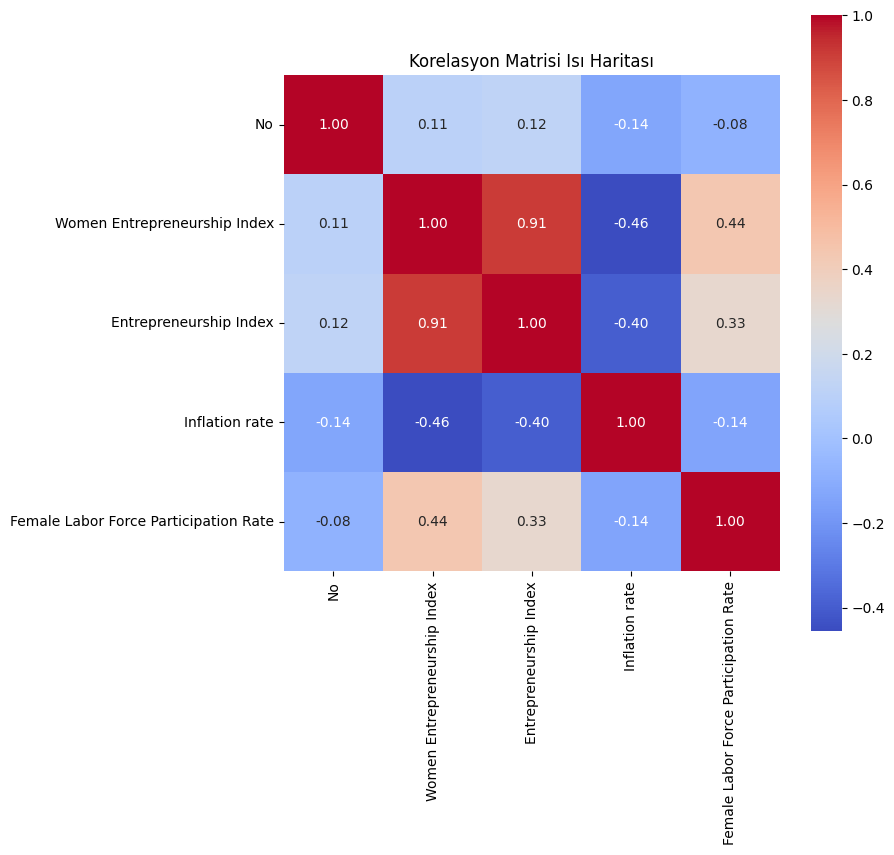

In [93]:
df_numeric = df_women_entr.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

Kadın Girişimcilik Endeksi ve Girişimcilik Endeksi arasında çok yüksek bir pozitif korelasyon var.Bu, bir ülkedeki girişimcilik ortamının genel sağlığının, kadın girişimciler için olanakların bir göstergesi olabileceğini işaret eder.
Kadın Girişimcilik Endeksi ve Enflasyon Oranı arasında orta negatif bir korelasyon bulunmaktadır, bu da yüksek enflasyon oranlarının kadın girişimciliği üzerinde olumsuz bir etkisi olabileceğini gösterir.
Kadın Girişimcilik Endeksi ile Kadın İşgücü Katılım Oranı arasında orta düzeyde bir pozitif korelasyon vardır, bu da işgücüne daha fazla kadının katılımının kadın girişimciliğini olumlu yönde etkileyebileceğini düşündürür.
Girişimcilik Endeksi ve Enflasyon Oranı arasındaki negatif korelasyonda benzer şekilde, yüksek enflasyonun girişimcilik ortamı üzerinde genel olarak olumsuz bir etkisi olabileceğini gösterir.

In [94]:
correlation_matrix = df_women_entr[['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Inflation rate', 'Female Labor Force Participation Rate']].corr()

correlation_matrix


,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
Women Entrepreneurship Index,1.000000,0.91458,-0.455532,0.441372
Entrepreneurship Index,0.914580,1.00000,-0.395370,0.334170
Inflation rate,-0.455532,-0.39537,1.000000,-0.139802
Female Labor Force Participation Rate,0.441372,0.33417,-0.139802,1.000000


AB üyesi olmayan gelişmiş ülkelerin Kadın Girişimciliği Endeksi ve Girişimcilik Endeksi, AB üyesi gelişmiş ülkelere göre daha yüksek. Bu, bu ülkelerde kadın girişimciliğinin ve genel girişimcilik ortamının daha iyi olduğunu gösterebilir.
Gelişmekte olan ülkelerde Kadın Girişimciliği Endeksi ve Girişimcilik Endeksi, gelişmiş ülkelere kıyasla oldukça düşük. Bu, bu ülkelerde girişimcilik ortamının zorlayıcı olabileceğini düşündürebilir.
Enflasyon oranının gelişmekte olan ülkelerde çok daha yüksek olduğu görülüyor, bu da ekonomik istikrarsızlığın bir göstergesi olabilir.
Kadın İş Gücüne Katılım Oranı, AB üyesi olmayan gelişmiş ülkelerde en yüksek, gelişmekte olan ülkelerde ise en düşük. Bu, işgücü piyasasının cinsiyete göre eşitlik durumunu yansıtabilir.

In [95]:
numeric_columns = df_women_entr.select_dtypes(include=[np.number])
grouped_data = df_women_entr.groupby(["European Union Membership","Level of development"])[numeric_columns.columns].mean()
grouped_data


No  \
European Union Membership Level of development              
Member                    Developed             28.650000   
Not Member                Developed             37.142857   
                          Developing            29.000000   

                                                Women Entrepreneurship Index  \
European Union Membership Level of development                                 
Member                    Developed                                58.835000   
Not Member                Developed                                60.857143   
                          Developing                               34.870833   

                                                Entrepreneurship Index  \
European Union Membership Level of development                           
Member                    Developed                          56.860000   
Not Member                Developed                          66.985714   
                          Developing                         33.466667   

                                                Inflation rate  \
European Union Membership Level of development                   
Member                    Developed                  -0.174000   
Not Member                Developed                   0.551429   
                          Developing                  5.482917   

                                                Female Labor Force Participation Rate  
European Union Membership Level of development                                         
Member                    Developed                                         61.585000  
Not Member                Developed                                         67.411429  
                          Developing                                        53.291250

AB üyesi ülkeler, girişimcilik endeksi ve kadın girişimcilik endeksi gibi değişkenlerde daha yüksek ortalamalara sahipken, enflasyon oranları daha düşük ve daha istikrarlıdır. AB üyesi ülkelerde kadınların işgücüne daha fazla katılımı vardır. Bu bulgular, Avrupa Birliği'ne üyeliğin hem ekonomik istikrar hem de kadın girişimciliği üzerinde olumlu bir etkisi olacağını göstermektedir.

In [96]:
eu_membership_comparison = df_women_entr.groupby('European Union Membership')[['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Inflation rate', 'Female Labor Force Participation Rate']].describe()
eu_membership_comparison


Women Entrepreneurship Index                       \
                                                 count      mean        std   
European Union Membership                                                     
Member                                            20.0  58.83500   7.370516   
Not Member                                        31.0  40.73871  13.122796   

                                                              \
                            min     25%    50%     75%   max   
European Union Membership                                      
Member                     43.0  54.525  57.15  64.825  69.7   
Not Member                 25.3  31.350  37.00  43.200  74.8   

                          Entrepreneurship Index             ...  \
                                           count       mean  ...   
European Union Membership                                    ...   
Member                                      20.0  56.860000  ...   
Not Member                                  31.0  41.035484  ...   

                          Inflation rate        \
                                     75%   max   
European Union Membership                        
Member                             0.275   0.9   
Not Member                         5.350  26.5   

                          Female Labor Force Participation Rate             \
                                                          count       mean   
European Union Membership                                                    
Member                                                     20.0  61.585000   
Not Member                                                 31.0  56.479677   

                                                                     
                                 std   min    25%   50%   75%   max  
European Union Membership                                            
Member                      8.150316  42.5  57.50  60.8  67.9  74.0  
Not Member                 16.362891  13.0  53.45  61.1  66.0  82.3  

[2 rows x 32 columns]

Euro kullanan ülkeler, kadın girişimciliği ve genel girişimcilik endeksi açısından daha yüksek ortalamalara sahip. Bu, Euro'nun sağladığı ekonomik istikrarın kadın girişimciliğini olumlu yönde etkileyebileceğini düşündürebilir.
Ulusal para birimini kullanan ülkelerde ortalama enflasyon oranı oldukça yüksek. Bu, ekonomik istikrarsızlığın bu ülkelerdeki girişimcilik ortamını olumsuz etkileyebileceğini gösteriyor.
Her iki grup için de Kadın Girişimciliği Endeksi, Girişimcilik Endeksi'nin %100'ünden fazla. Bu, kadınların girişimcilik faaliyetlerinde görece daha aktif olduğunu gösteriyor olabilir.


In [97]:
numeric_columns = df_women_entr.select_dtypes(include=[np.number])
grouped_data = df_women_entr.groupby("Currency")[numeric_columns.columns].mean()
grouped_data

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
Currency,,,,,
Euro,28.400000,58.60,57.553333,-0.165333,60.840000
National Currency,30.638889,43.35,42.944444,3.734722,57.499167


Grafik, Kadın Girişimcilik Endeksi ile Enflasyon Oranı arasında genel bir negatif ilişki gösteriyor: Kadın girişimciliği endeksi yüksek olan ülkelerde enflasyon oranı daha düşük. Bu, ekonomik istikrarın kadın girişimciliğini olumlu etkileyebileceğini işaret ediyor. Gelişmiş ve AB üyesi ülkeler genellikle bu trendi takip ederken, gelişmekte olan ve AB dışındaki ülkeler daha yüksek enflasyon ve daha düşük kadın girişimciliği endeksine sahip. Bu durum, gelişmiş ekonomilerin ve AB üyeliğinin, kadın girişimciler için daha elverişli koşullar sunduğunu gösteriyor olabilir.

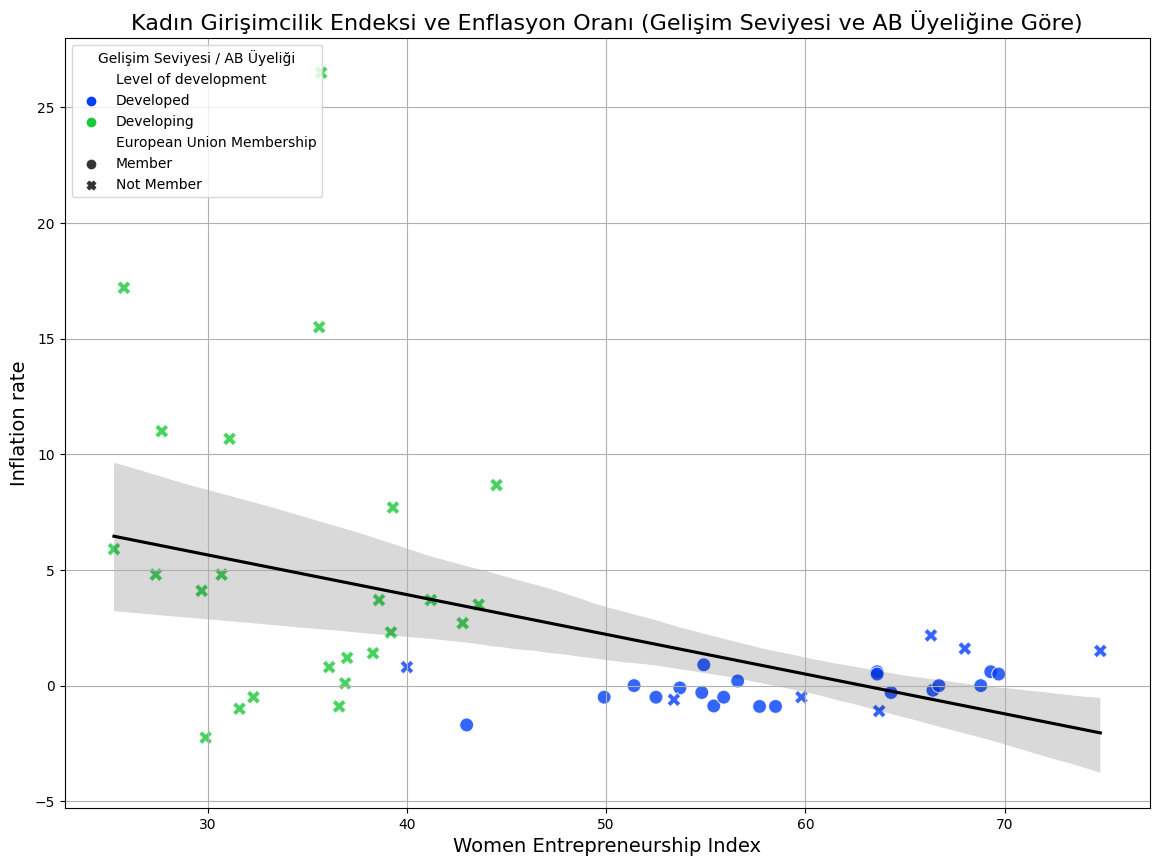

In [98]:
plt.figure(figsize=(14, 10))

sns.scatterplot(x='Women Entrepreneurship Index', y='Inflation rate', 
                hue='Level of development', style='European Union Membership', data=df_women_entr,
                s=100, palette='bright6', alpha=0.8)

plt.title('Kadın Girişimcilik Endeksi ve Enflasyon Oranı (Gelişim Seviyesi ve AB Üyeliğine Göre)', fontsize=16)
plt.xlabel('Kadın Girişimcilik Endeksi', fontsize=14)
plt.ylabel('Enflasyon Oranı', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', title='Gelişim Seviyesi / AB Üyeliği')

sns.regplot(x='Women Entrepreneurship Index', y='Inflation rate', data=df_women_entr,
            scatter=False, color='black')

plt.show()


Kadın Girişimcilik Endeksini tahmin etmek için regresyon modeli kullandım.Çünkü bu, belirli özellikler (girişimcilik endeksi, enflasyon oranı ve kadın işgücüne katılım oranı) ile kadınların girişimcilik aktivitelerinin seviyesi arasındaki ilişkiyi anlamamıza yardımcı olur. Regresyon, bu ilişkiyi niceliksel olarak modellemek ve özelliklerin hedef değişken üzerindeki etkisini tahmin etmek için ideal bir yöntemdir.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error


X = df_women_entr[['Entrepreneurship Index', 'Inflation rate', 'Female Labor Force Participation Rate']]
y = df_women_entr['Women Entrepreneurship Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=3)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2, 'MAE': mae}

results

{'Linear Regression': {'MSE': 22.625512350965604,
  'R^2': 0.8359178923606888,
  'MAE': 3.9181396607597687},
 'Random Forest': {'MSE': 14.437759636363683,
  'R^2': 0.8952961597520144,
  'MAE': 2.9316363636363705},
 'Support Vector Regression': {'MSE': 67.62237442161887,
  'R^2': 0.5095968857385748,
  'MAE': 7.9032209000718145},
 'K-Nearest Neighbors': {'MSE': 16.816767676767668,
  'R^2': 0.8780433944972336,
  'MAE': 3.812121212121212}}

Random Forest modeli en iyi performansı gösterdi ve veri setindeki varyansın yaklaşık %90'ını açıklayabilmiştir. Bu model, aynı zamanda en düşük Mean Squared Error (MSE) ve Mean Absolute Error (MAE) değerlerine sahiptir, bu da tahminlerinin gerçek değerlere en yakın olduğunu gösterir.

# Male and female labour force participation rate

In [100]:
df_male_labor_part.head()

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, male (% ages 15 and older) (1990)","Labour force participation rate, male (% ages 15 and older) (1991)","Labour force participation rate, male (% ages 15 and older) (1992)","Labour force participation rate, male (% ages 15 and older) (1993)","Labour force participation rate, male (% ages 15 and older) (1994)",...,"Labour force participation rate, male (% ages 15 and older) (2012)","Labour force participation rate, male (% ages 15 and older) (2013)","Labour force participation rate, male (% ages 15 and older) (2014)","Labour force participation rate, male (% ages 15 and older) (2015)","Labour force participation rate, male (% ages 15 and older) (2016)","Labour force participation rate, male (% ages 15 and older) (2017)","Labour force participation rate, male (% ages 15 and older) (2018)","Labour force participation rate, male (% ages 15 and older) (2019)","Labour force participation rate, male (% ages 15 and older) (2020)","Labour force participation rate, male (% ages 15 and older) (2021)"
0,AFG,Afghanistan,Asia,Northern Hemisphere,180.0,77.430,77.176,76.871,76.580,76.330,...,76.420,75.588,74.737,73.875,73.045,72.183,72.023,71.863,65.580,66.515
1,AGO,Angola,Africa,Southern Hemisphere,148.0,79.292,79.367,79.405,79.409,79.381,...,79.922,79.930,79.912,79.865,79.827,79.756,79.653,79.519,78.798,79.071
2,ALB,Albania,Europe,Northern Hemisphere,67.0,72.510,75.143,75.858,75.222,74.680,...,65.197,61.180,62.984,63.957,64.800,66.440,67.247,67.742,65.631,66.154
3,AND,Andorra,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,26.0,91.714,91.894,91.989,92.196,92.168,...,89.976,90.557,91.098,91.509,91.697,91.559,90.621,90.686,87.191,88.003


NaN değerler hangi ülkelerde kaç adet mevcut onu bulalım

In [101]:
nan_rows_male_labor_part = df_male_labor_part[df_male_labor_part.isna().any(axis=1)]

for index, row in nan_rows_male_labor_part.iterrows():
    nan_columns_count_male_labor_part = row.isna().sum()
    
    print(f"Country: {row['Country']}, NaN Columns Count: {nan_columns_count_male_labor_part}")


Country: Andorra, NaN Columns Count: 32
Country: Antigua and Barbuda, NaN Columns Count: 32
Country: Dominica, NaN Columns Count: 32
Country: Micronesia, NaN Columns Count: 32
Country: Grenada, NaN Columns Count: 32
Country: Kiribati, NaN Columns Count: 32
Country: Saint Kitts and Nevis, NaN Columns Count: 32
Country: Liechtenstein, NaN Columns Count: 32
Country: Monaco, NaN Columns Count: 33
Country: Marshall Islands, NaN Columns Count: 32
Country: Nauru, NaN Columns Count: 33
Country: Palau, NaN Columns Count: 32
Country: North Korea, NaN Columns Count: 1
Country: San Marino, NaN Columns Count: 32
Country: Somalia, NaN Columns Count: 1
Country: Seychelles, NaN Columns Count: 32
Country: Tuvalu, NaN Columns Count: 32


NaN değerler hangi ülkelerde kaç adet mevcut onu bulalım

In [102]:
nan_rows_female_labor_part = df_female_labor_part[df_female_labor_part.isna().any(axis=1)]

for index, row in nan_rows_female_labor_part.iterrows():
    nan_columns_count_female_labor_part = row.isna().sum()
    
    print(f"Country: {row['Country']}, NaN Columns Count: {nan_columns_count_female_labor_part}")


Country: Andorra, NaN Columns Count: 32
Country: Antigua and Barbuda, NaN Columns Count: 32
Country: Dominica, NaN Columns Count: 32
Country: Micronesia, NaN Columns Count: 32
Country: Grenada, NaN Columns Count: 32
Country: Kiribati, NaN Columns Count: 32
Country: Saint Kitts and Nevis, NaN Columns Count: 32
Country: Liechtenstein, NaN Columns Count: 32
Country: Monaco, NaN Columns Count: 33
Country: Marshall Islands, NaN Columns Count: 32
Country: Nauru, NaN Columns Count: 33
Country: Palau, NaN Columns Count: 32
Country: North Korea, NaN Columns Count: 1
Country: San Marino, NaN Columns Count: 32
Country: Somalia, NaN Columns Count: 1
Country: Seychelles, NaN Columns Count: 32
Country: Tuvalu, NaN Columns Count: 32


Bu iki veri seti için aynı sütunlar mı boş onu kontrol edelim

In [103]:
nan_columns_female_labor_part = set(df_female_labor_part.columns[df_female_labor_part.isna().any()])
nan_columns_male_labor_part = set(df_male_labor_part.columns[df_male_labor_part.isna().any()])

unique_to_female = nan_columns_female_labor_part - nan_columns_male_labor_part
unique_to_male = nan_columns_male_labor_part - nan_columns_female_labor_part

print(f"Kadın iş gücü veri setinde erkek iş gücü veri setinde olmayan sütun sayısı: {len(unique_to_female)}")
print(f"Erkek iş gücü veri setinde kadın iş gücü veri setinde olmayan sütun sayısı: {len(unique_to_male)}")


Kadın iş gücü veri setinde erkek iş gücü veri setinde olmayan sütun sayısı: 32
Erkek iş gücü veri setinde kadın iş gücü veri setinde olmayan sütun sayısı: 32


Female ve Male diye sütun isimlendirmelerinde fark olduğu için böyle bir problem olabilir. Bir de female ve male değerlerini dikkate almadan karşılaştırma yapalım

In [104]:
def normalize_column_name(column_name):
    return column_name.replace(", female", "").replace(", male", "")

normalized_female_columns = {normalize_column_name(column) for column in df_female_labor_part.columns[df_female_labor_part.isna().any()]}
normalized_male_columns = {normalize_column_name(column) for column in df_male_labor_part.columns[df_male_labor_part.isna().any()]}

common_normalized_columns = normalized_female_columns.intersection(normalized_male_columns)

unique_to_female_normalized = normalized_female_columns - common_normalized_columns
unique_to_male_normalized = normalized_male_columns - common_normalized_columns

print(f"Kadın ve erkek iş gücü veri setlerinde ortak olmayan normalize edilmiş sütun sayısı: {len(unique_to_female_normalized.union(unique_to_male_normalized))}")

Kadın ve erkek iş gücü veri setlerinde ortak olmayan normalize edilmiş sütun sayısı: 0


Tüm sütunlarımız aynı. NaN veriler de aynı mı kontrol edelim

In [105]:
nan_columns_female = df_female_labor_part.columns[df_female_labor_part.isna().any()].tolist()
nan_columns_male = df_male_labor_part.columns[df_male_labor_part.isna().any()].tolist()

normalized_nan_columns_female = {normalize_column_name(col) for col in nan_columns_female}
normalized_nan_columns_male = {normalize_column_name(col) for col in nan_columns_male}

common_nan_columns = normalized_nan_columns_female.intersection(normalized_nan_columns_male)

# Eşleşme kontrolü
if common_nan_columns == normalized_nan_columns_female and common_nan_columns == normalized_nan_columns_male:
    print("Her iki cinsiyet için de NaN değerler içeren normalize edilmiş veriler aynı.")
else:
    print("NaN değerler içeren normalize edilmiş veriler her iki cinsiyet için aynı değil.")
    if common_nan_columns != normalized_nan_columns_female:
        unique_nan_columns_female = normalized_nan_columns_female - common_nan_columns
        print(f"Yalnızca kadın veri setine özgü NaN sütunlar: {unique_nan_columns_female}")
    if common_nan_columns != normalized_nan_columns_male:
        unique_nan_columns_male = normalized_nan_columns_male - common_nan_columns
        print(f"Yalnızca erkek veri setine özgü NaN sütunlar: {unique_nan_columns_male}")


Her iki cinsiyet için de NaN değerler içeren normalize edilmiş veriler aynı.


Kadın verileri için de Erkek verileri için de NaN değerler aynı.

Sadece tek NaN değere sahip satırları bulalım ve hangi sütunları NaN inceleyelim

In [106]:
nan_numbers_female_labor_part = df_female_labor_part.isnull().sum(axis=1)

tek_nan_satirlar_female_labor_part = df_female_labor_part[nan_numbers_female_labor_part == 1]

nan_iceren_sutunlar_female_labor_part = tek_nan_satirlar_female_labor_part.columns[tek_nan_satirlar_female_labor_part.isnull().any()].tolist()

In [107]:
tek_nan_satirlar_female_labor_part

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, female (% ages 15 and older) (1990)","Labour force participation rate, female (% ages 15 and older) (1991)","Labour force participation rate, female (% ages 15 and older) (1992)","Labour force participation rate, female (% ages 15 and older) (1993)","Labour force participation rate, female (% ages 15 and older) (1994)",...,"Labour force participation rate, female (% ages 15 and older) (2012)","Labour force participation rate, female (% ages 15 and older) (2013)","Labour force participation rate, female (% ages 15 and older) (2014)","Labour force participation rate, female (% ages 15 and older) (2015)","Labour force participation rate, female (% ages 15 and older) (2016)","Labour force participation rate, female (% ages 15 and older) (2017)","Labour force participation rate, female (% ages 15 and older) (2018)","Labour force participation rate, female (% ages 15 and older) (2019)","Labour force participation rate, female (% ages 15 and older) (2020)","Labour force participation rate, female (% ages 15 and older) (2021)"
142,PRK,North Korea,Asia,Northern Hemisphere,NaN,76.596,76.833,77.201,77.465,77.625,...,78.050,78.023,77.997,78.072,77.919,78.105,78.327,78.408,77.501,77.185
158,SOM,Somalia,Africa,Northern Hemisphere,NaN,21.712,21.620,21.555,21.506,21.442,...,20.571,20.660,20.753,20.838,20.915,20.980,21.040,21.106,20.833,20.901


In [108]:
nan_iceren_sutunlar_female_labor_part

['HDI Rank (2021)']

Somali ve Kuzey Kore'nin 2021 HDI sıralamaları NaN olarak girilmiş. İncelediğimizde Somali HDI sıralamasına 2022 yılında girmiş. Kuzey Kore ise HDR (Human Development Reports) kaynaklarında bulunmuyor. Bu sebeple Kuzey Kore HDI sıralamasına dahil olmadığı için, Somali de HDI'ya 2021'den sonra dahil olduğu için bu değerleri boş bırakmak durumundayız

Male olan değerler için de sonuç aynı mı inceleyelim

In [109]:
nan_numbers_male_labor_part = df_male_labor_part.isnull().sum(axis=1)

tek_nan_satirlar_male_labor_part = df_male_labor_part[nan_numbers_male_labor_part == 1]

nan_iceren_sutunlar_male_labor_part = tek_nan_satirlar_male_labor_part.columns[tek_nan_satirlar_male_labor_part.isnull().any()].tolist()

In [110]:
tek_nan_satirlar_male_labor_part

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, male (% ages 15 and older) (1990)","Labour force participation rate, male (% ages 15 and older) (1991)","Labour force participation rate, male (% ages 15 and older) (1992)","Labour force participation rate, male (% ages 15 and older) (1993)","Labour force participation rate, male (% ages 15 and older) (1994)",...,"Labour force participation rate, male (% ages 15 and older) (2012)","Labour force participation rate, male (% ages 15 and older) (2013)","Labour force participation rate, male (% ages 15 and older) (2014)","Labour force participation rate, male (% ages 15 and older) (2015)","Labour force participation rate, male (% ages 15 and older) (2016)","Labour force participation rate, male (% ages 15 and older) (2017)","Labour force participation rate, male (% ages 15 and older) (2018)","Labour force participation rate, male (% ages 15 and older) (2019)","Labour force participation rate, male (% ages 15 and older) (2020)","Labour force participation rate, male (% ages 15 and older) (2021)"
142,PRK,North Korea,Asia,Northern Hemisphere,NaN,86.589,86.634,86.696,86.73,86.747,...,86.754,86.75,86.745,86.750,86.736,86.751,86.764,86.768,86.116,86.141
158,SOM,Somalia,Africa,Northern Hemisphere,NaN,45.036,45.300,45.492,45.64,45.822,...,48.553,48.34,48.113,47.907,47.718,47.558,47.408,47.240,46.868,46.978


In [111]:
nan_iceren_sutunlar_male_labor_part

['HDI Rank (2021)']

İki verisetinde de aynı satırların aynı sütunlarında NaN değerler mevcut. Bu kontrolü veri setlerini birleştirirken problem yaşamamak için yaptık

Diğer boş değerler içeren satırlar için hangi değerler boş onu inceleyelim.

In [112]:
nan_sayilari_female_labor_part = df_female_labor_part.isnull().sum(axis=1)

coklu_nan_satirlar_female_labor_part = df_female_labor_part[nan_sayilari_female_labor_part > 1]

nan_iceren_sutunlar_coklu_female_labor_part = coklu_nan_satirlar_female_labor_part.columns[coklu_nan_satirlar_female_labor_part.isnull().any()].tolist()

coklu_nan_satirlar_female_labor_part

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, female (% ages 15 and older) (1990)","Labour force participation rate, female (% ages 15 and older) (1991)","Labour force participation rate, female (% ages 15 and older) (1992)","Labour force participation rate, female (% ages 15 and older) (1993)","Labour force participation rate, female (% ages 15 and older) (1994)",...,"Labour force participation rate, female (% ages 15 and older) (2012)","Labour force participation rate, female (% ages 15 and older) (2013)","Labour force participation rate, female (% ages 15 and older) (2014)","Labour force participation rate, female (% ages 15 and older) (2015)","Labour force participation rate, female (% ages 15 and older) (2016)","Labour force participation rate, female (% ages 15 and older) (2017)","Labour force participation rate, female (% ages 15 and older) (2018)","Labour force participation rate, female (% ages 15 and older) (2019)","Labour force participation rate, female (% ages 15 and older) (2020)","Labour force participation rate, female (% ages 15 and older) (2021)"
3,AND,Andorra,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ATG,Antigua and Barbuda,America,Northern Hemisphere,71.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,DMA,Dominica,America,Northern Hemisphere,102.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,FSM,Micronesia,Oceania,Northern Hemisphere,134.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,GRD,Grenada,America,Northern Hemisphere,68.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,KIR,Kiribati,Oceania,Northern Hemisphere,136.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,KNA,Saint Kitts and Nevis,America,Northern Hemisphere,75.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,LIE,Liechtenstein,Europe,Northern Hemisphere,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,MCO,Monaco,Europe,Northern Hemisphere,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,MHL,Marshall Islands,Oceania,Northern Hemisphere,131.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tüm satırlarda istatiksel değerler mevcut değil. Ancak Monaco'da HDI Rank sıralaması da mevcut değil. Monaco Prenslik ve Meşruti monarşi ile yönetildiği için HDI sıralamasında yer almamaktadır. Bu sebeple boş bırakabiliriz. Aynı işlemi erkek veriseti için de yapalım

In [113]:
nan_sayilari_male_labor_part = df_male_labor_part.isnull().sum(axis=1)

coklu_nan_satirlar_male_labor_part = df_male_labor_part[nan_sayilari_male_labor_part > 1]

nan_iceren_sutunlar_coklu_male_labor_part = coklu_nan_satirlar_male_labor_part.columns[coklu_nan_satirlar_male_labor_part.isnull().any()].tolist()

coklu_nan_satirlar_male_labor_part

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, male (% ages 15 and older) (1990)","Labour force participation rate, male (% ages 15 and older) (1991)","Labour force participation rate, male (% ages 15 and older) (1992)","Labour force participation rate, male (% ages 15 and older) (1993)","Labour force participation rate, male (% ages 15 and older) (1994)",...,"Labour force participation rate, male (% ages 15 and older) (2012)","Labour force participation rate, male (% ages 15 and older) (2013)","Labour force participation rate, male (% ages 15 and older) (2014)","Labour force participation rate, male (% ages 15 and older) (2015)","Labour force participation rate, male (% ages 15 and older) (2016)","Labour force participation rate, male (% ages 15 and older) (2017)","Labour force participation rate, male (% ages 15 and older) (2018)","Labour force participation rate, male (% ages 15 and older) (2019)","Labour force participation rate, male (% ages 15 and older) (2020)","Labour force participation rate, male (% ages 15 and older) (2021)"
3,AND,Andorra,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ATG,Antigua and Barbuda,America,Northern Hemisphere,71.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,DMA,Dominica,America,Northern Hemisphere,102.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,FSM,Micronesia,Oceania,Northern Hemisphere,134.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,GRD,Grenada,America,Northern Hemisphere,68.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,KIR,Kiribati,Oceania,Northern Hemisphere,136.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,KNA,Saint Kitts and Nevis,America,Northern Hemisphere,75.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,LIE,Liechtenstein,Europe,Northern Hemisphere,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,MCO,Monaco,Europe,Northern Hemisphere,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,MHL,Marshall Islands,Oceania,Northern Hemisphere,131.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Male ve Female için olan veri setlerinde NaN içeren satırlar ve NaN olan sütunlar aynı. Kadın ve erkek verilerini kıyaslayabilmek için veri setlerini birleştireceğiz.

In [114]:
merged_df_labor_part = pd.merge(df_female_labor_part, df_male_labor_part, 
                     on=['HDI Rank (2021)', 'ISO3', 'Country', 'Continent', 'Hemisphere'])

merged_df_labor_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 69 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   ISO3                                                                  195 non-null    object 
 1   Country                                                               195 non-null    object 
 2   Continent                                                             195 non-null    object 
 3   Hemisphere                                                            195 non-null    object 
 4   HDI Rank (2021)                                                       191 non-null    float64
 5   Labour force participation rate, female (% ages 15 and older) (1990)  180 non-null    float64
 6   Labour force participation rate, female (% ages 15 and older) (1991)  180 non-null    float64
 7  

Ortak 5 sütun bulmuştuk. Ve her veri setinde toplamda 37 sütun vardı. Ortak değerler çıkarıldığında her veri setinde 32 sütun olması gerekiyordu. Biz bu iki veri setini birleştirdik ve totalde 5'i ortak 64'ü ayrı sütun elde ettik. Dolayısıyla merge işlemi başarılı

Şimdi de istatistiksel değer içermeyen satırları veri setimizden sileceğiz. Çünkü sayısal analiz yaparken bu veriler istatistiksel olarak veri içermediği için işimize yaramayacaktır.

In [115]:
countries_to_remove = [
    'Andorra', 'Antigua and Barbuda', 'Dominica', 'Micronesia', 'Grenada',
    'Kiribati', 'Saint Kitts and Nevis', 'Liechtenstein', 'Monaco', 'Marshall Islands',
    'Nauru', 'Palau', 'San Marino', 'Seychelles', 'Tuvalu'
]

merged_df_labor_part_deleted_rows = merged_df_labor_part[~merged_df_labor_part['Country'].isin(countries_to_remove)]

merged_df_labor_part_deleted_rows.isnull().sum()

ISO3                                                                  0
Country                                                               0
Continent                                                             0
Hemisphere                                                            0
HDI Rank (2021)                                                       2
                                                                     ..
Labour force participation rate, male (% ages 15 and older) (2017)    0
Labour force participation rate, male (% ages 15 and older) (2018)    0
Labour force participation rate, male (% ages 15 and older) (2019)    0
Labour force participation rate, male (% ages 15 and older) (2020)    0
Labour force participation rate, male (% ages 15 and older) (2021)    0
Length: 69, dtype: int64

In [116]:
merged_df_labor_part_deleted_rows.head()

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, female (% ages 15 and older) (1990)","Labour force participation rate, female (% ages 15 and older) (1991)","Labour force participation rate, female (% ages 15 and older) (1992)","Labour force participation rate, female (% ages 15 and older) (1993)","Labour force participation rate, female (% ages 15 and older) (1994)",...,"Labour force participation rate, male (% ages 15 and older) (2012)","Labour force participation rate, male (% ages 15 and older) (2013)","Labour force participation rate, male (% ages 15 and older) (2014)","Labour force participation rate, male (% ages 15 and older) (2015)","Labour force participation rate, male (% ages 15 and older) (2016)","Labour force participation rate, male (% ages 15 and older) (2017)","Labour force participation rate, male (% ages 15 and older) (2018)","Labour force participation rate, male (% ages 15 and older) (2019)","Labour force participation rate, male (% ages 15 and older) (2020)","Labour force participation rate, male (% ages 15 and older) (2021)"
0,AFG,Afghanistan,Asia,Northern Hemisphere,180.0,15.180,15.214,15.223,15.197,15.178,...,76.420,75.588,74.737,73.875,73.045,72.183,72.023,71.863,65.580,66.515
1,AGO,Angola,Africa,Southern Hemisphere,148.0,75.408,75.381,75.369,75.371,75.387,...,79.922,79.930,79.912,79.865,79.827,79.756,79.653,79.519,78.798,79.071
2,ALB,Albania,Europe,Northern Hemisphere,67.0,51.364,54.727,55.608,54.638,53.825,...,65.197,61.180,62.984,63.957,64.800,66.440,67.247,67.742,65.631,66.154
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,26.0,29.083,29.779,30.272,30.944,31.121,...,89.976,90.557,91.098,91.509,91.697,91.559,90.621,90.686,87.191,88.003
5,ARG,Argentina,America,Southern Hemisphere,47.0,45.041,46.331,47.486,48.717,49.576,...,73.538,73.135,72.283,71.749,71.213,70.674,70.717,71.223,66.141,71.603


Totalde istatistiksel değer içermeyen 15 ülke vardı. Ve bunları merge ettiğimiz verisetimizden sildik.

**HDI**, İnsani Gelişme Endeksi'nin kısaltmasıdır ve Birleşmiş Milletler Kalkınma Programı (UNDP) tarafından ülkelerin insani gelişme düzeylerini ölçmek için kullanılan bir göstergedir. 

In [117]:
df_fm_labor_part=merged_df_labor_part_deleted_rows
df_fm_labor_part

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, female (% ages 15 and older) (1990)","Labour force participation rate, female (% ages 15 and older) (1991)","Labour force participation rate, female (% ages 15 and older) (1992)","Labour force participation rate, female (% ages 15 and older) (1993)","Labour force participation rate, female (% ages 15 and older) (1994)",...,"Labour force participation rate, male (% ages 15 and older) (2012)","Labour force participation rate, male (% ages 15 and older) (2013)","Labour force participation rate, male (% ages 15 and older) (2014)","Labour force participation rate, male (% ages 15 and older) (2015)","Labour force participation rate, male (% ages 15 and older) (2016)","Labour force participation rate, male (% ages 15 and older) (2017)","Labour force participation rate, male (% ages 15 and older) (2018)","Labour force participation rate, male (% ages 15 and older) (2019)","Labour force participation rate, male (% ages 15 and older) (2020)","Labour force participation rate, male (% ages 15 and older) (2021)"
0,AFG,Afghanistan,Asia,Northern Hemisphere,180.0,15.180,15.214,15.223,15.197,15.178,...,76.420,75.588,74.737,73.875,73.045,72.183,72.023,71.863,65.580,66.515
1,AGO,Angola,Africa,Southern Hemisphere,148.0,75.408,75.381,75.369,75.371,75.387,...,79.922,79.930,79.912,79.865,79.827,79.756,79.653,79.519,78.798,79.071
2,ALB,Albania,Europe,Northern Hemisphere,67.0,51.364,54.727,55.608,54.638,53.825,...,65.197,61.180,62.984,63.957,64.800,66.440,67.247,67.742,65.631,66.154
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,26.0,29.083,29.779,30.272,30.944,31.121,...,89.976,90.557,91.098,91.509,91.697,91.559,90.621,90.686,87.191,88.003
5,ARG,Argentina,America,Southern Hemisphere,47.0,45.041,46.331,47.486,48.717,49.576,...,73.538,73.135,72.283,71.749,71.213,70.674,70.717,71.223,66.141,71.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,Southern Hemisphere,111.0,32.575,32.688,32.728,32.612,32.734,...,55.050,55.083,55.094,54.948,54.652,54.627,54.735,54.616,54.277,54.237
191,YEM,Yemen,Asia,Northern Hemisphere,183.0,17.130,17.096,17.081,16.999,17.017,...,67.126,66.790,66.370,67.047,67.419,67.726,67.945,68.140,67.498,67.637
192,ZAF,South Africa,Africa,Southern Hemisphere,109.0,44.166,44.325,44.501,44.693,44.906,...,60.248,60.407,60.638,61.941,62.177,62.588,62.286,62.433,57.394,59.883
193,ZMB,Zambia,Africa,Southern Hemisphere,154.0,73.507,73.510,73.531,73.563,73.599,...,80.118,79.990,79.823,79.610,79.383,79.102,78.786,78.469,77.722,77.847


* HDI rank'i düşük olan ülkelerde (yani daha yüksek HDI değerine sahip olanlar, çünkü HDI rank düşükse gelişmişlik yüksektir), hem kadın hem de erkek iş gücü katılım oranları genellikle daha yüksek gibi görünmektedir.
* HDI rank'i arttıkça, yani gelişmişlik azaldıkça, erkek iş gücü katılım oranlarının nispeten daha yüksek kaldığı ancak kadın iş gücü katılım oranlarının daha fazla değişkenlik gösterdiği ve genel olarak düşme eğiliminde olduğu görülüyor.
* Ayrıca, HDI rank'ine göre kadın ve erkek iş gücü katılım oranları arasında bir açılma olduğu gözlemlenebilir. Bu durum, gelişmekte olan ülkelerde cinsiyetler arası eşitsizliğin daha belirgin olabileceğini işaret ediyor olabilir.

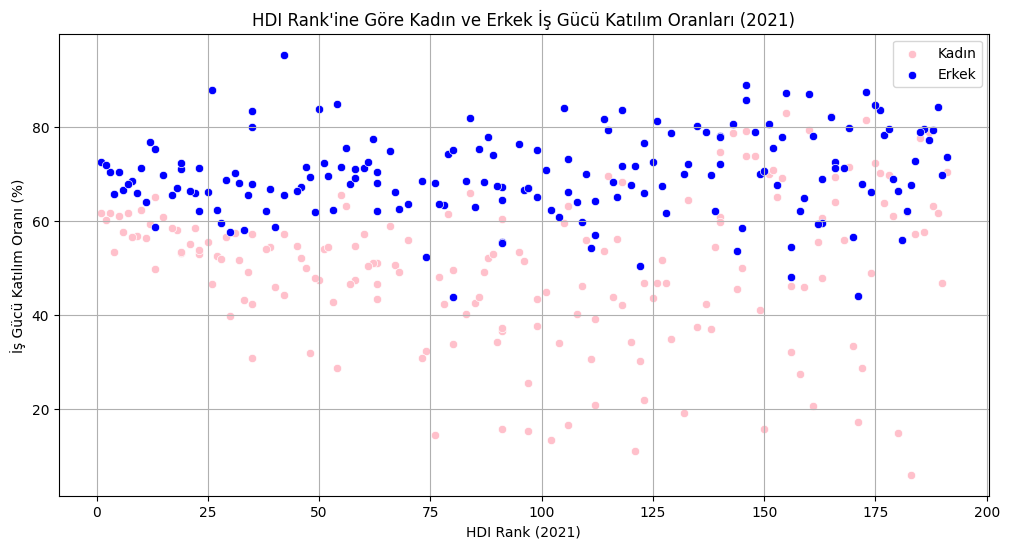

In [118]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HDI Rank (2021)', y='Labour force participation rate, female (% ages 15 and older) (2021)', data=df_fm_labor_part, color='pink', label='Kadın')
sns.scatterplot(x='HDI Rank (2021)', y='Labour force participation rate, male (% ages 15 and older) (2021)', data=df_fm_labor_part,color='blue', label='Erkek')
plt.title('HDI Rank\'ine Göre Kadın ve Erkek İş Gücü Katılım Oranları (2021)')
plt.xlabel('HDI Rank (2021)')
plt.ylabel('İş Gücü Katılım Oranı (%)')
plt.legend()
plt.grid(True)
plt.show()

Erkek iş gücü katılım oranları, gözlenen dönem boyunca nispeten sabit kalmış ve yaklaşık olarak %75 civarında seyretmiş.
Kadın iş gücü katılım oranları ise aynı dönemde önemli ölçüde daha düşük olmuş ve yaklaşık %50 civarında bir değere sahip.
Grafikteki verilere bakıldığında, kadın ve erkek iş gücü katılım oranları arasında belirgin bir fark olduğu görülüyor ve bu fark zaman içinde değişmemiş.


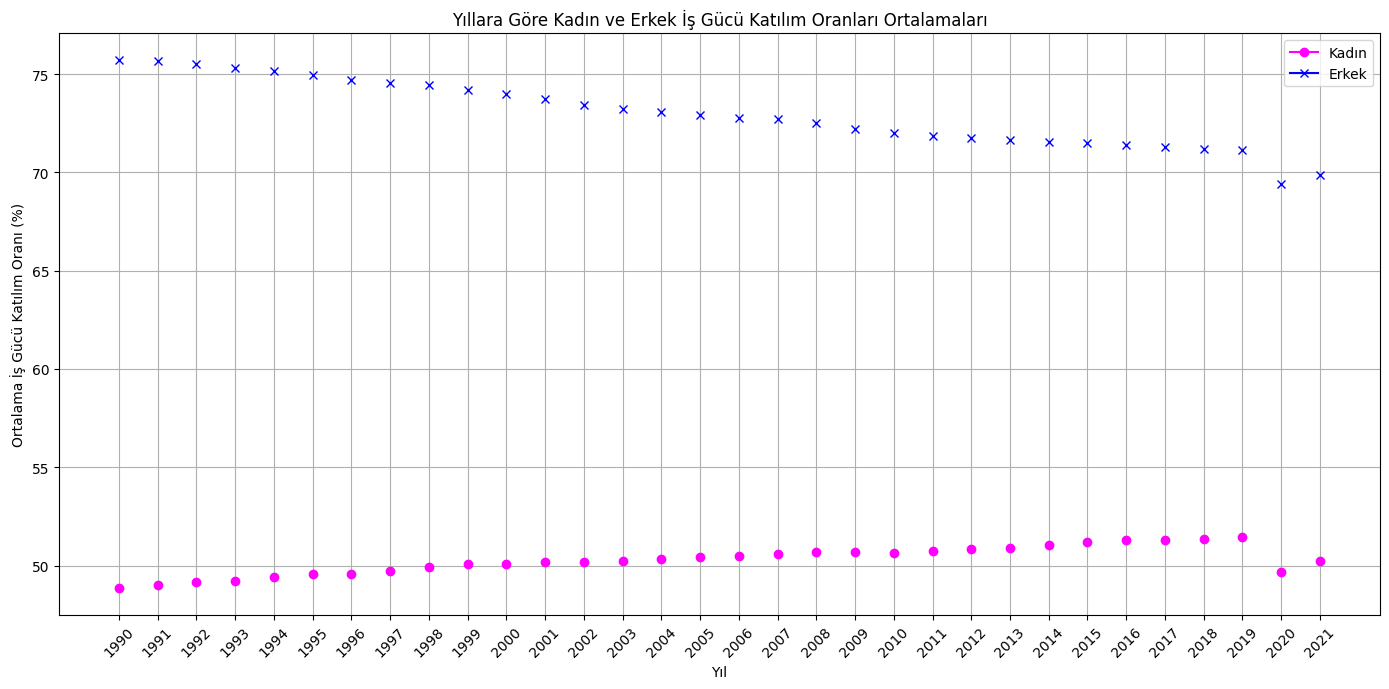

In [119]:

years = [str(year) for year in range(1990, 2022)]

female_participation_columns = [
    'Labour force participation rate, female (% ages 15 and older) (' + year + ')'
    for year in years
]
male_participation_columns = [
    'Labour force participation rate, male (% ages 15 and older) (' + year + ')'
    for year in years
]
plt.figure(figsize=(14, 7))

for year in years:
    female_rate = df_fm_labor_part['Labour force participation rate, female (% ages 15 and older) (' + year + ')'].mean()
    male_rate = df_fm_labor_part['Labour force participation rate, male (% ages 15 and older) (' + year + ')'].mean()
    plt.plot(year, female_rate, 'o-', color='magenta', label='Kadın' if year == years[0] else "")
    plt.plot(year, male_rate, 'x-', color='blue', label='Erkek' if year == years[0] else "")

# Çizimi güzelleştirelim
plt.title('Yıllara Göre Kadın ve Erkek İş Gücü Katılım Oranları Ortalamaları')
plt.xlabel('Yıl')
plt.ylabel('Ortalama İş Gücü Katılım Oranı (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


# Placement

In [120]:
df_placement.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [121]:
df_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


Kadınların ve erkeklerin eğitim düzeylerindeki ortalama başarılarına bakalım:

İncelenen grupta kadınların, eğitim süreçlerinde SSC, HSC ve lisans (degree) programlarında erkeklerden daha yüksek yüzdelik başarı oranlarına sahip olduğu görülmekte. Bu, kadınların belirtilen eğitim aşamalarında akademik olarak daha başarılı olduklarına dair bir gösterge olabilir. Bununla birlikte, işe alım testinde erkekler daha yüksek bir başarı oranı sergilemişler, bu da belki de farklı bir beceri setinin veya testin doğasının erkek adayların lehine olduğuna işaret edebilir ya da işe alımlarda erkeklerin kadınlardan daha öncelikli olduğunu düşünen bir sistem var. Çünkü erkeklerin sadece işe alım testinde kadınlardan yüksek aldığı görülmekte. MBA yüzdesine gelince, kadınların yine daha yüksek başarı gösterdiği görülmektedir.

In [122]:
average_education_levels = df_placement.groupby('gender')[['ssc_percentage','hsc_percentage', 'degree_percentage', 'emp_test_percentage','mba_percent']].mean()
average_education_levels

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
gender,,,,,
F,68.310921,66.646842,68.090000,70.590658,64.643553
M,66.752518,66.161655,65.429856,72.926115,60.984892


In [123]:
df_placement.groupby('gender')[["work_experience"]].count()


,work_experience
gender,
F,76
M,139


In [124]:
df_placement.groupby(['ssc_board', 'gender'])['ssc_percentage'].mean().reset_index()

,ssc_board,gender,ssc_percentage
0,Central,F,66.650714
1,Central,M,65.856216
2,Others,F,70.361765
3,Others,M,67.772923


In [125]:
df_placement.groupby(['hsc_board','gender'])['hsc_percentage'].mean().reset_index()

,hsc_board,gender,hsc_percentage
0,Central,F,67.990909
1,Central,M,65.697647
2,Others,F,65.615349
3,Others,M,66.430568


In [126]:
gender_placement_counts = df_placement.groupby(['gender', 'status']).size().unstack()
total_gender_counts = df_placement['gender'].value_counts()
placement_rates_by_gender = gender_placement_counts.div(total_gender_counts, axis=0) * 100

placement_rates_by_gender


status,Not Placed,Placed
gender,,
F,36.842105,63.157895
M,28.057554,71.942446


Eğitim notlarının işe yerleştirme başarısı üzerinde önemli bir etkiye sahip olduğunu göstermekle birlikte, işveren testi notları ve MBA not ortalamasının etkisinin göreceli olarak daha az olduğunu gösteriyor.

In [127]:
df_placement['status_numeric'] = df_placement['status'].apply(lambda x: 1 if x == 'Placed' else 0)
selected_columns = ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent', 'status_numeric']
df_placement[selected_columns].corr()


,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,status_numeric
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478,0.607889
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823,0.491228
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364,0.479861
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055,0.127639
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000,0.076922
status_numeric,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000


Bu datasetin verilerine bakılarak bir tahminleme modeli yapılabilir. Bu tahminleme işe yerleştirme durumunu tahmin etmek için yapılabilir.
* Lojistik Regresyon
* Karar Ağaçları
* Rassal Ormanlar
* Destek Vektör Makineleri (SVM)
* Gradient Boosting Machines (GBM)
* Yapay Sinir Ağları

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_placement[['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']]
Y = df_placement['status_numeric']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

models = {
    "Lojistik Regresyon": LogisticRegression(max_iter=1000, random_state=42),
    "Karar Ağacı": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Destek Vektör Makineleri": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Yapay Sinir Ağları": MLPClassifier(max_iter=1000, random_state=42)
}

accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, Y_train)  
    predictions = model.predict(X_test)  
    accuracy = accuracy_score(Y_test, predictions)  
    accuracy_scores[name] = accuracy

accuracy_scores
#Karar Ağacı modeli bu veri seti için en yüksek doğruluk oranını (%86.05) elde etti.

{'Lojistik Regresyon': 0.7906976744186046,
 'Karar Ağacı': 0.8604651162790697,
 'Random Forest': 0.813953488372093,
 'Destek Vektör Makineleri': 0.7674418604651163,
 'Gradient Boosting': 0.813953488372093,
 'Yapay Sinir Ağları': 0.7209302325581395}

**Kadınların Ücretsiz Çalışma Saatleri ve İşgücüne Katılım Oranı Arasındaki İlişki**

In [129]:
combined_df = pd.merge(df_unpaidWork, df_labor_force_ratio, on=['Entity', 'Year'], how='inner')

combined_df = combined_df[['Entity', 'Year', 'Female to male ratio of time devoted to unpaid care work (OECD (2014))', "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"]].dropna()

correlation = combined_df[['Female to male ratio of time devoted to unpaid care work (OECD (2014))', "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"]].corr()

combined_df.head()

,Entity,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014)),Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
0,Albania,2014,7.21,69.435100
1,Algeria,2014,6.75,23.523653
2,Argentina,2014,2.88,65.852270
3,Armenia,2014,5.24,73.764860
4,Australia,2014,1.81,82.664375


Bu iki oran arasındaki korelasyon katsayısı **-0.538848** olarak hesaplanmış. Bu değer, orta şiddette negatif bir ilişkiyi gösterir. Yani, ücretsiz bakım işlerine daha fazla zaman ayıran kadınların, işgücüne katılım oranlarının daha düşük olduğuna işaret edebilir.

In [130]:
correlation

,Female to male ratio of time devoted to unpaid care work (OECD (2014)),Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
Female to male ratio of time devoted to unpaid care work (OECD (2014)),1.000000,-0.538848
Ratio of female to male labor force participation rate (%) (modeled ILO estimate),-0.538848,1.000000


**Kadınların erkeklere göre işgücüne katılım oranının volatilite değerinin ülkenin özelliklerine göre karşılaştırma**

Yüksek volatilite değeri, bir ülkenin iş gücü piyasasında büyük ve hızlı değişikliklerin yaşandığını gösterir. Bu, ekonomik istikrarsızlık, sosyal ve politik değişiklikler, sektörel değişimler, demografik faktörler veya uluslararası etkiler gibi çeşitli nedenlerle olabilir.

In [131]:
Q1 = volatility_df['Volatility'].quantile(0.25)
Q3 = volatility_df['Volatility'].quantile(0.75)
IQR = Q3 - Q1
outliers = volatility_df[(volatility_df['Volatility'] < (Q1 - 1.5 * IQR))| #-1.2160043424927096
                         (volatility_df['Volatility'] > (Q3 + 1.5 * IQR))] #3.5423688538109497

outliers

,Volatility
Entity,
Iran,6.558584
Syria,6.409062
Saudi Arabia,5.991467
Pakistan,5.973205
Turkey,5.817007
Yemen,5.634537
Egypt,5.510200
West Bank and Gaza,5.322943
Iraq,5.078586


In [132]:
df_women_entr.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [133]:
df_women_entr.rename(columns={'Country': 'Entity'}, inplace=True)
df_wmv=pd.merge(volatility_df, df_women_entr, on='Entity')
df_wmv.head()

,Entity,Volatility,No,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,Saudi Arabia,5.991467,48,Developing,Not Member,National Currency,37.0,49.6,1.2,13.0
1,Turkey,5.817007,59,Developing,Not Member,National Currency,39.3,54.6,7.7,30.4
2,Egypt,5.510200,15,Developing,Not Member,National Currency,27.7,28.1,11.0,64.6
3,Costa Rica,3.737435,11,Developing,Not Member,National Currency,36.1,37.7,0.8,59.4
4,Bolivia,3.338180,7,Developing,Not Member,National Currency,29.7,28.0,4.1,69.4


* Gelişmekte olan ve AB üyesi olmayan ülkeler, ekonomik yapının daha kırılgan olduğu ve istikrarsızlık riskinin daha yüksek olduğu yerlerdir. Bu tür ülkelerde, kadınların iş gücüne katılım oranlarının düşük olması, ekonomik kaynakların tam olarak kullanılmadığını ve bu da ekonomik dayanıklılığı olumsuz etkileyebileceğini gösterebilir.


In [134]:
df_wmv_sorted = df_wmv.sort_values(by='Volatility', ascending=False)
df_wmv_sorted.head()

,Entity,Volatility,No,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,Saudi Arabia,5.991467,48,Developing,Not Member,National Currency,37.0,49.6,1.2,13.0
1,Turkey,5.817007,59,Developing,Not Member,National Currency,39.3,54.6,7.7,30.4
2,Egypt,5.510200,15,Developing,Not Member,National Currency,27.7,28.1,11.0,64.6
3,Costa Rica,3.737435,11,Developing,Not Member,National Currency,36.1,37.7,0.8,59.4
4,Bolivia,3.338180,7,Developing,Not Member,National Currency,29.7,28.0,4.1,69.4


**Kadınların İşgücü Katılım Oranları ile Anne Ölümleri**

In [135]:
df_wmm = pd.merge(df_maternal_mortality, df_women_entr, on=['Entity'])


In [136]:
df_wmm

,Entity,Code,Year,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015)),No,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,Algeria,DZA,2000,161.0,1,Developing,Not Member,National Currency,27.4,30.2,4.80,18.0
1,Algeria,DZA,2001,155.0,1,Developing,Not Member,National Currency,27.4,30.2,4.80,18.0
2,Algeria,DZA,2002,148.0,1,Developing,Not Member,National Currency,27.4,30.2,4.80,18.0
3,Algeria,DZA,2003,145.0,1,Developing,Not Member,National Currency,27.4,30.2,4.80,18.0
4,Algeria,DZA,2004,134.0,1,Developing,Not Member,National Currency,27.4,30.2,4.80,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1776,Uruguay,URY,2013,18.0,60,Developing,Not Member,National Currency,44.5,41.4,8.67,68.0
1777,Uruguay,URY,2014,17.0,60,Developing,Not Member,National Currency,44.5,41.4,8.67,68.0
1778,Uruguay,URY,2015,18.0,60,Developing,Not Member,National Currency,44.5,41.4,8.67,68.0
1779,Uruguay,URY,2016,18.0,60,Developing,Not Member,National Currency,44.5,41.4,8.67,68.0


In [137]:
selected_columns = df_wmm[['Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))', 'Women Entrepreneurship Index', 'Inflation rate']]


* Kadın girişimciliği endeksi yüksek olan yerlerde anne ölümlülüğü oranının daha düşük olabileceğine işaret ediyor olabilir. Yani kadın girişimciliğinin yaygın olduğu toplumlarda, kadınların sağlık hizmetlerine erişimi veya genel sağlık ve refah durumlarının daha iyi olabileceği düşünülebilir.
* Yüksek enflasyon oranları genellikle ekonomik istikrarsızlık veya zayıf sağlık hizmetlerinin göstergesi olabilir ve bu da anne sağlığını olumsuz etkileyebilir.

In [138]:
corr_matrix = selected_columns.corr()
corr_matrix


,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015)),Women Entrepreneurship Index,Inflation rate
Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015)),1.000000,-0.560318,0.459511
Women Entrepreneurship Index,-0.560318,1.000000,-0.435566
Inflation rate,0.459511,-0.435566,1.000000
